# Curso de Manejo de Datos Faltantes: Imputación

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=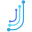)](https://jvelezmagic.com/)

![Curso de Manejo de Datos Faltantes: Exploración](course-logo.jpg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib missingno nhanes pandas scipy seaborn session-info sklearn statsmodels upsetplot
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (8, 6)
    }
)

sns.set_style("whitegrid")

## El problema de trabajar con valores faltantes

In [4]:
airquality_df = (
    sm.datasets.get_rdataset("airquality")
    .data
    .clean_names(
        case_type="snake"
    )
    .add_column("year", 1973)
    .assign(
        date=lambda df: pd.to_datetime(df[["year", "month", "day"]])
    )
    .sort_values(by="date")
    .set_index("date")
)

airquality_df

ozone  solar_r  wind  temp  month  day  year
date                                                    
1973-05-01   41.0    190.0   7.4    67      5    1  1973
1973-05-02   36.0    118.0   8.0    72      5    2  1973
1973-05-03   12.0    149.0  12.6    74      5    3  1973
1973-05-04   18.0    313.0  11.5    62      5    4  1973
1973-05-05    NaN      NaN  14.3    56      5    5  1973
...           ...      ...   ...   ...    ...  ...   ...
1973-09-26   30.0    193.0   6.9    70      9   26  1973
1973-09-27    NaN    145.0  13.2    77      9   27  1973
1973-09-28   14.0    191.0  14.3    75      9   28  1973
1973-09-29   18.0    131.0   8.0    76      9   29  1973
1973-09-30   20.0    223.0  11.5    68      9   30  1973

[153 rows x 7 columns]

In [5]:
(
    smf.ols(
        formula="temp ~ ozone",
        data=airquality_df
    )
    .fit()
    .summary()
    .tables[0]
)

<class 'statsmodels.iolib.table.SimpleTable'>

In [6]:
(
    smf.ols(
        formula="temp ~ ozone + solar_r",
        data=airquality_df
    )
    .fit()
    .summary()
    .tables[0]
)

<class 'statsmodels.iolib.table.SimpleTable'>

En cada modelo, se usaron diferentes observaciones, ya que cada uno elimino los valores faltantes, por lo tanto, no seria lo correcto comparar estos dos modelos

### Reto: Datos de supervivientes

In [7]:
survival_df = sm.datasets.get_rdataset("flchain", "survival").data
survival_df

age sex  sample.yr  kappa  lambda  flc.grp  creatinine  mgus  futime  \
0      97   F       1997  5.700   4.860       10         1.7     0      85   
1      92   F       2000  0.870   0.683        1         0.9     0    1281   
2      94   F       1997  4.360   3.850       10         1.4     0      69   
3      92   F       1996  2.420   2.220        9         1.0     0     115   
4      93   F       1996  1.320   1.690        6         1.1     0    1039   
...   ...  ..        ...    ...     ...      ...         ...   ...     ...   
7869   52   F       1995  1.210   1.610        6         1.0     0    4997   
7870   52   F       1999  0.858   0.581        1         0.8     0    3652   
7871   54   F       2002  1.700   1.720        8         NaN     0    2507   
7872   53   F       1995  1.710   2.690        9         NaN     0    4982   
7873   50   F       1998  1.190   1.250        4         0.7     0    3995   

      death      chapter  
0         1  Circulatory  
1         1    Neoplasms  
2         1  Circulatory  
3         1  Circulatory  
4         1  Circulatory  
...     ...          ...  
7869      0          NaN  
7870      0          NaN  
7871      0          NaN  
7872      0          NaN  
7873      0          NaN  

[7874 rows x 11 columns]

Ajusta algunos modelos utilizando a las variables con valores faltantes como predictoras. ¿Qué sucede?

In [8]:
# Aquí tu código...
""""
model_survive = smf.logit(
    formula="death ~ kappa + mgus + chapter",
    data=survival_df
).fit()

model_survive.summary()
"""

'"\nmodel_survive = smf.logit(\n    formula="death ~ kappa + mgus + chapter",\n    data=survival_df\n).fit()\n\nmodel_survive.summary()\n'

Lo importante de este error, es aprender que los modelos nos daran errores cuando trabajemos con valores faltantes

## Preparando datos: _National Health and Nutrition Examination Survey_

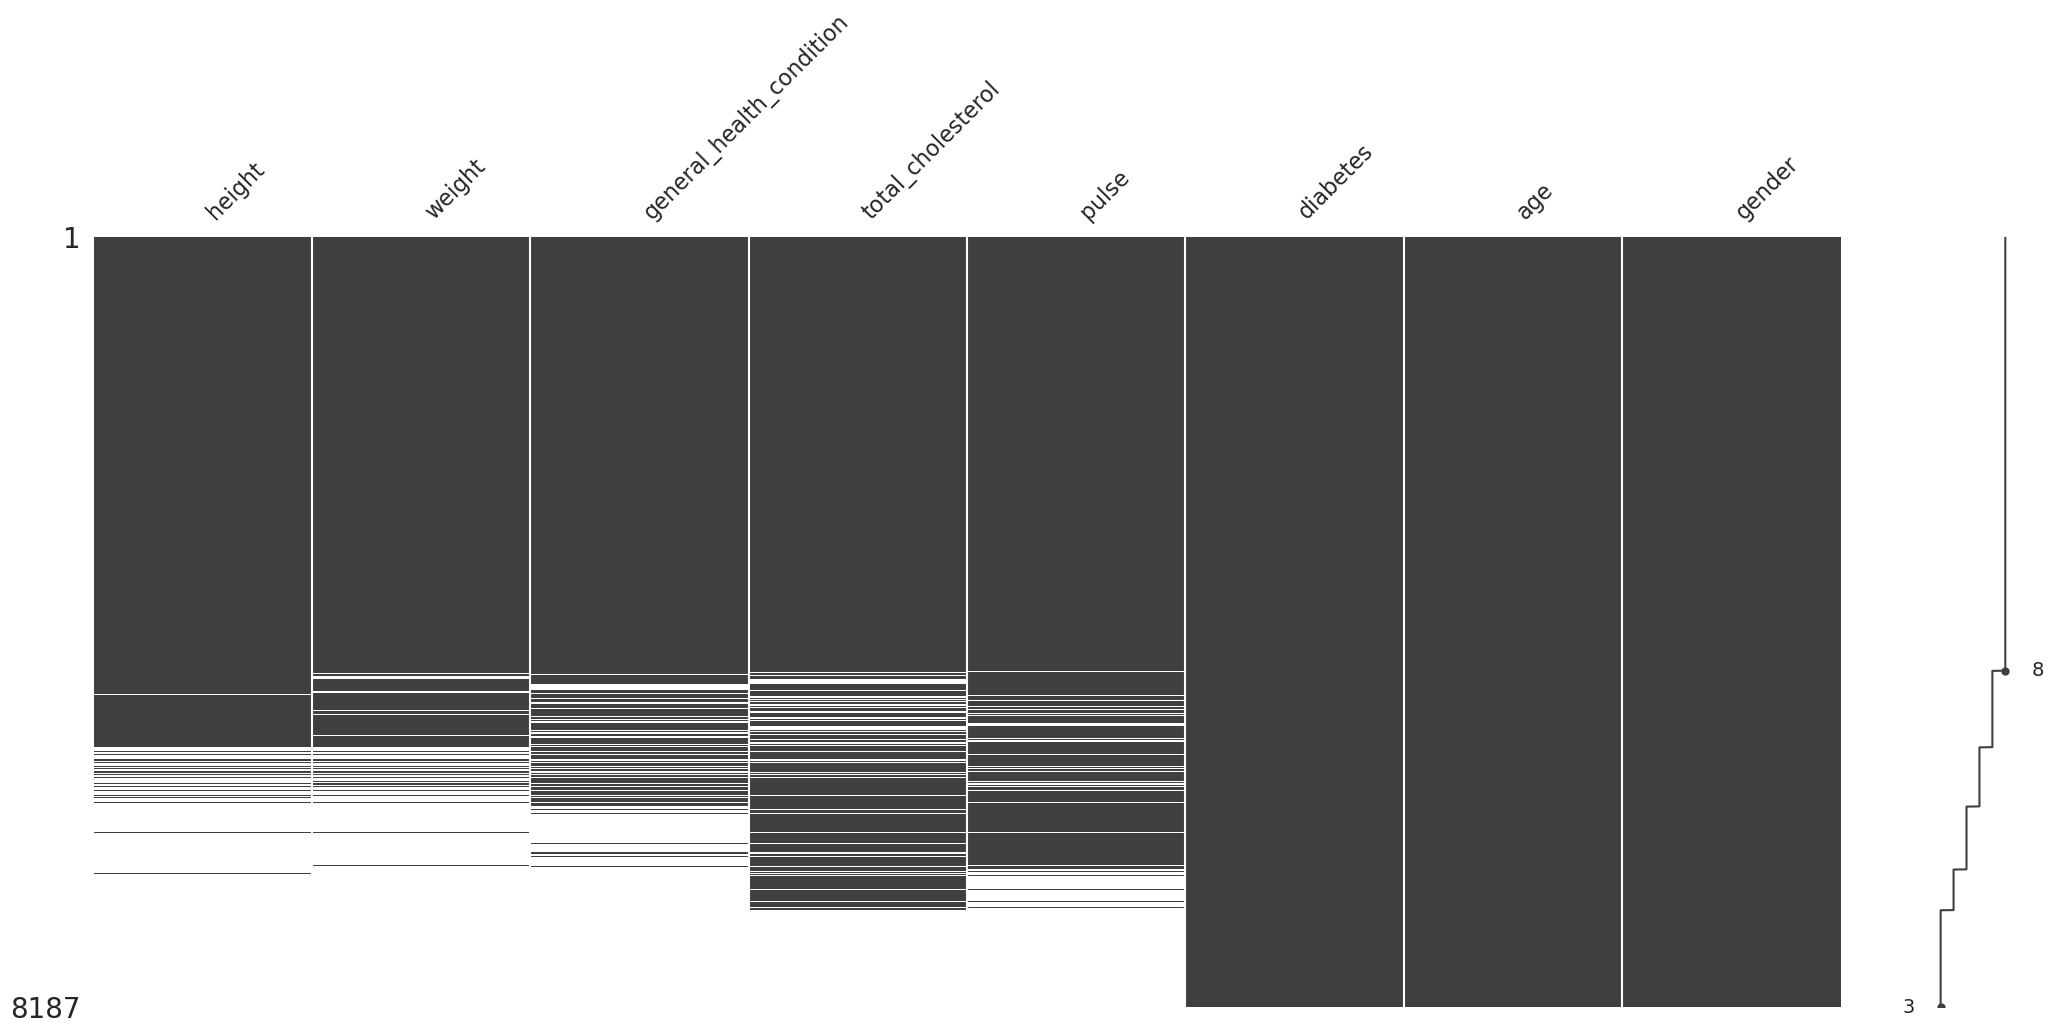

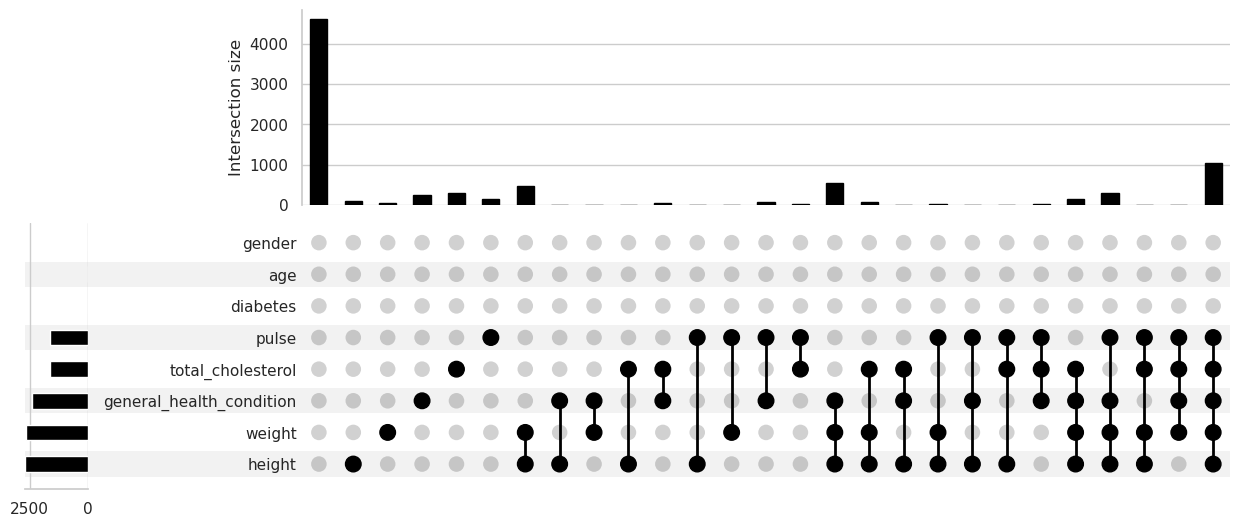

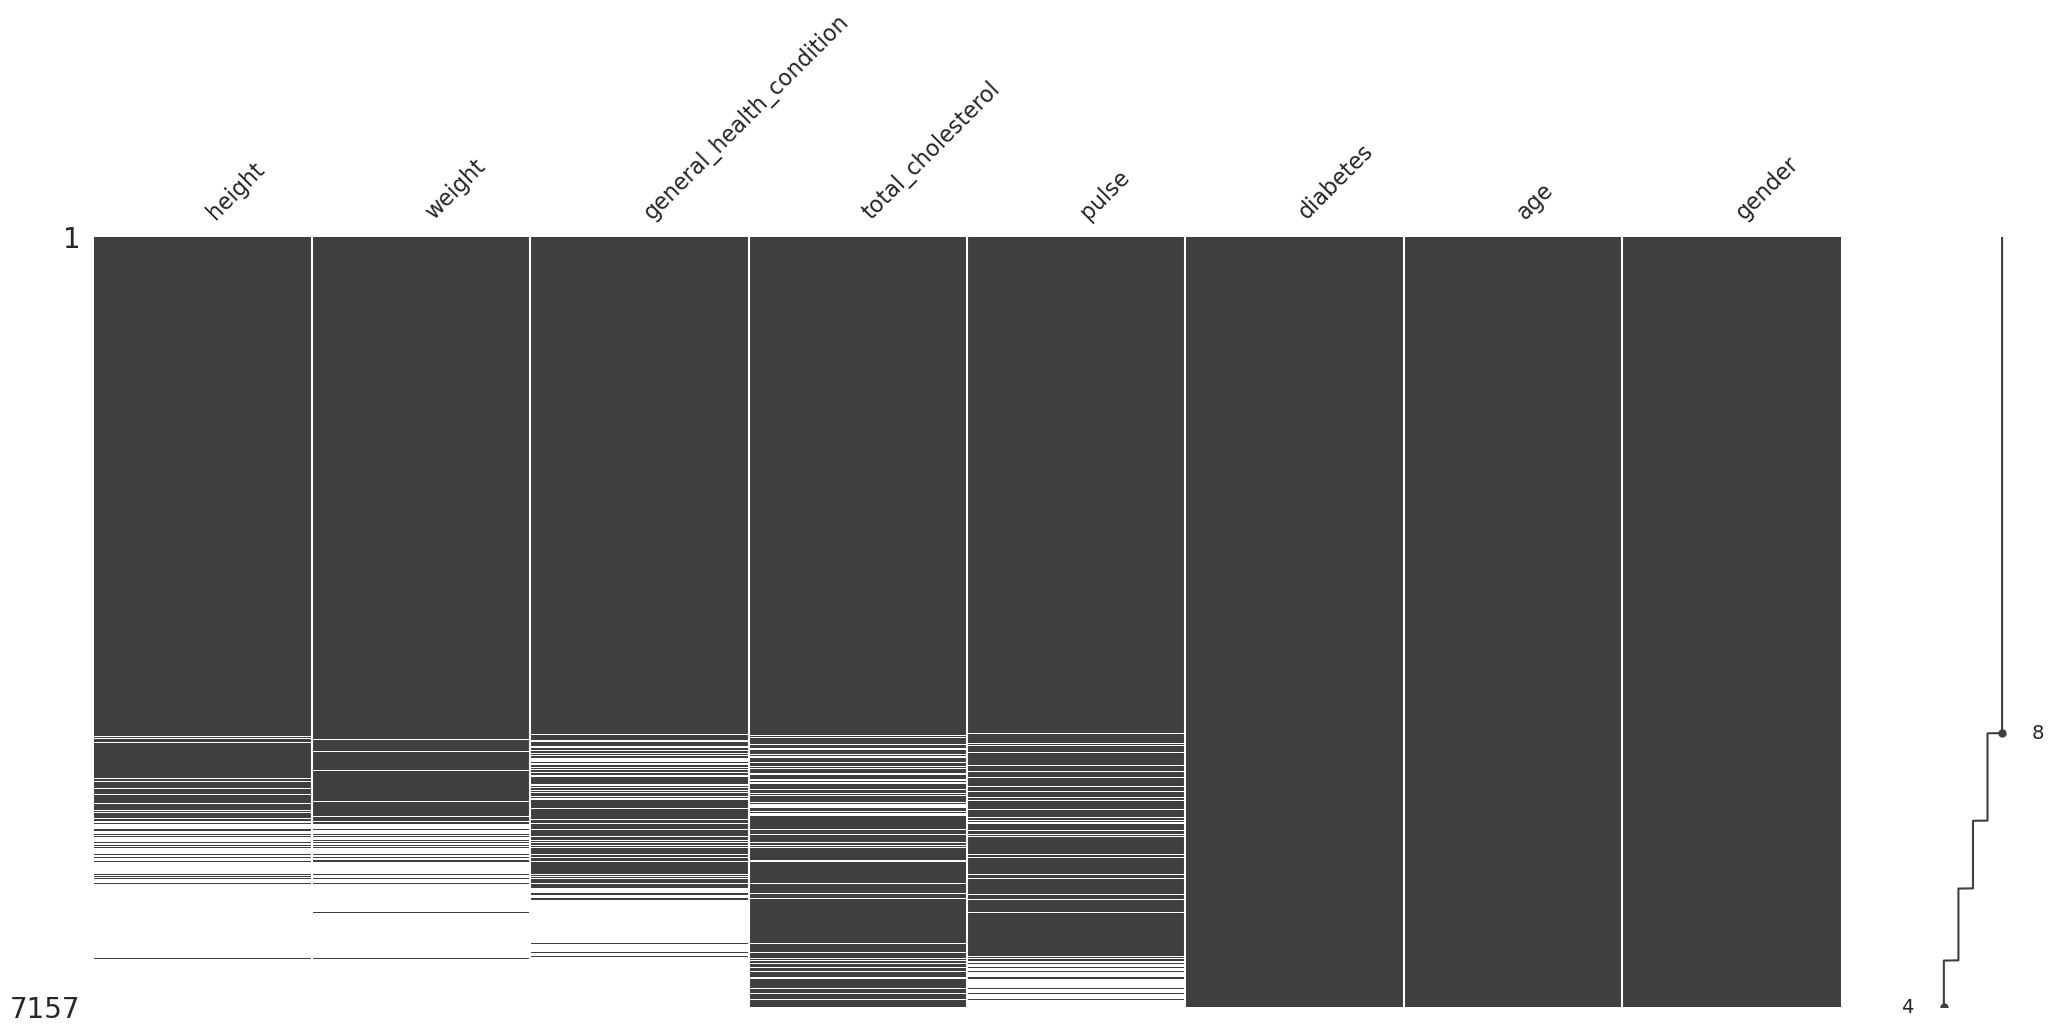

In [9]:
%run live-download-data-and-load-it.ipynb

## Consideración y evaluación de los distintos tipos de valores faltantes

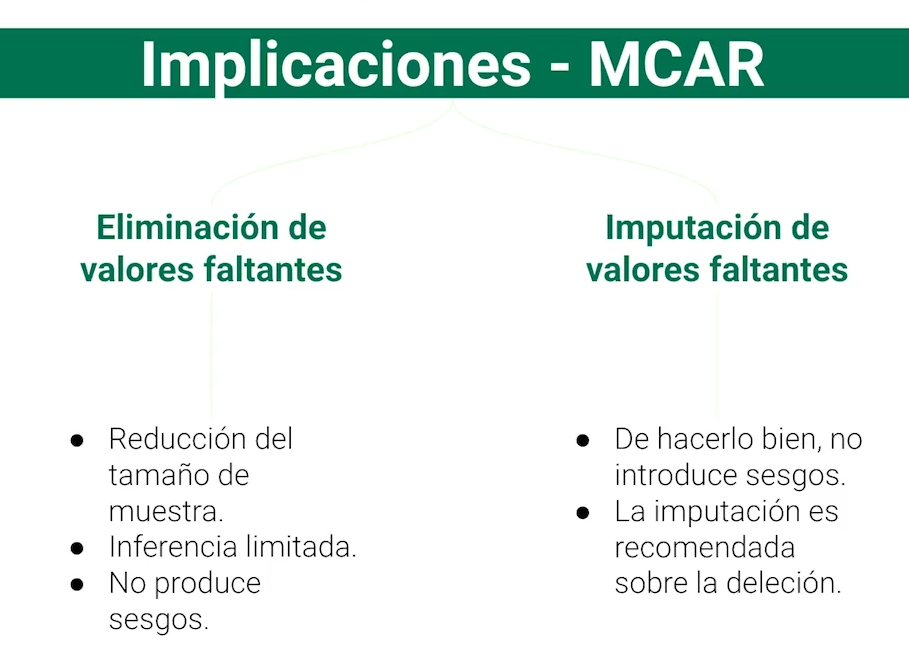

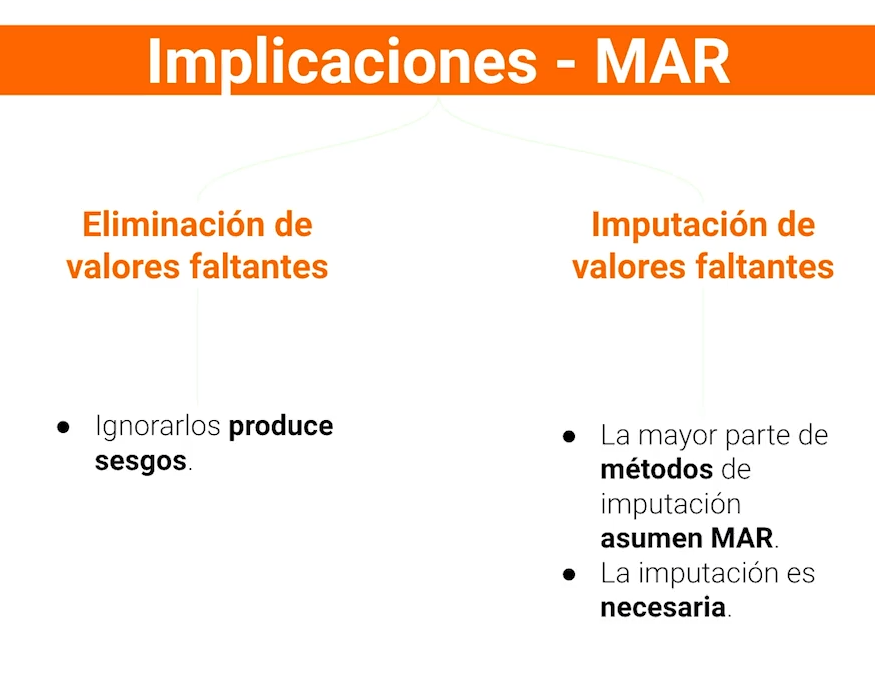

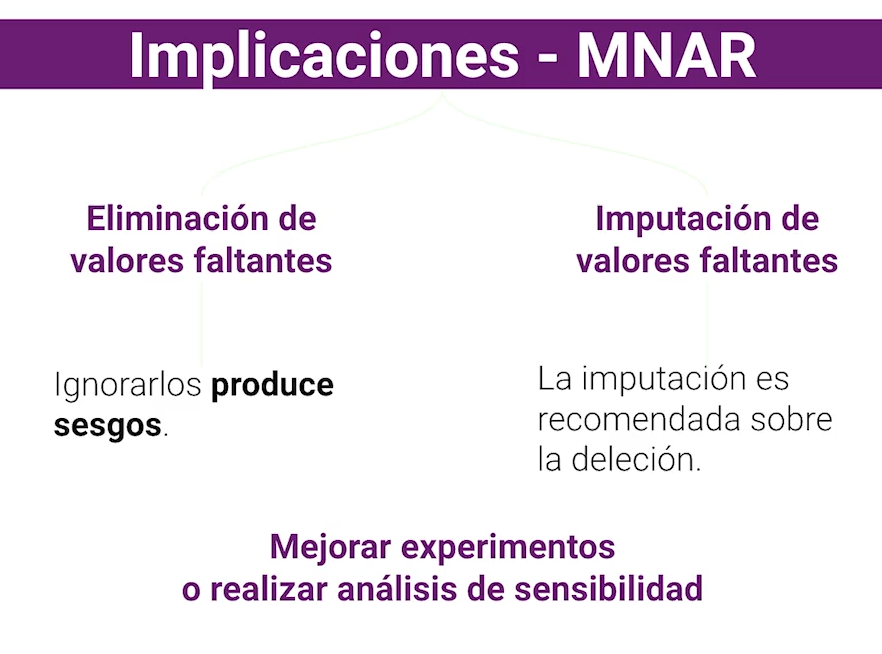

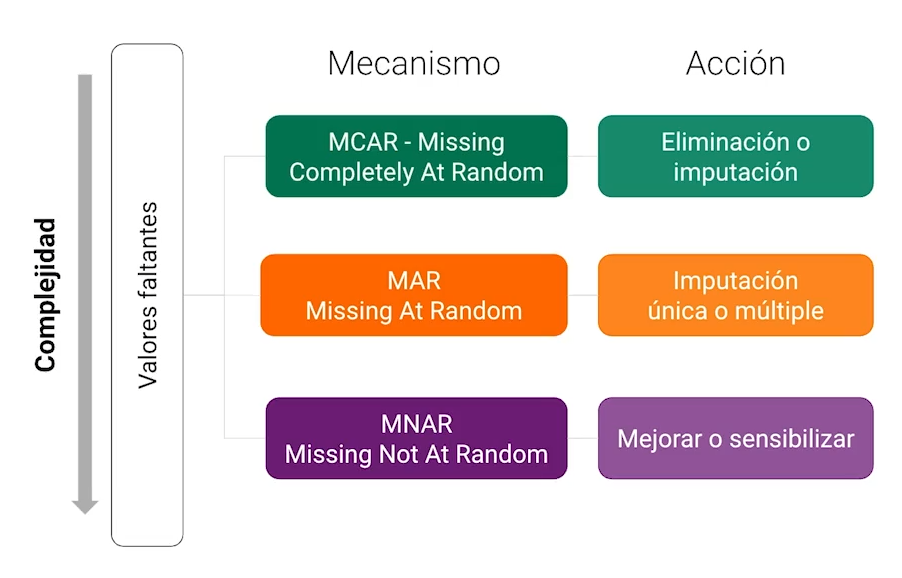

## Evaluación del mecanismo de valores faltantes por prueba de _t-test_

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
<code>two-sided</code>: las <b>medias</b> de las distribuciones subyacentes a las muestras son <b>desiguales</b>.<br>
<code>less</code>: la <b>media</b> de la distribución subyacente a la <b>primera</b> muestra es <b>menor</b> que la media de la distribución subyacente a la <b>segunda</b> muestra.<br>
<code>greater</code>: la <b>media</b> de la distribución subyacente a la <b>primera</b> muestra es <b>mayor</b> que la media de la distribución subyacente a la <b>segunda</b> muestra.<br>
    </p>
</div>

In [10]:
female_weight, male_weight = (
    nhanes_df
    .select_columns("gender", "weight")
    .transform_column(
        "weight",
        lambda x: x.isna(),
        elementwise= False
    )
    .groupby("gender")
    .weight
    .pipe(
        lambda df: (
            df.get_group("Female"),
            df.get_group("Male")
        )
    )
)

scipy.stats.ttest_ind(
    a = female_weight,
    b = male_weight,
    alternative="two-sided"
)

TtestResult(statistic=-0.3621032192538131, pvalue=0.7172855918077239, df=7155.0)

El p-value nos dice que no hay una diferencia entre el peso de los hombres y de las mujeres

El código realiza una prueba t-test independiente usando la función ttest_ind del módulo scipy.stats. La prueba t-test comparará la media de dos grupos de datos y determinará si existe una diferencia significativa entre ellos.

El primer argumento a es el primer grupo de datos (female_weight) y el segundo argumento b es el segundo grupo de datos (male_weight).

El argumento alternative especifica el tipo de hipótesis nula a probar, en este caso “two-sided” indica que se está realizando una prueba two-tailed, es decir, se está investigando si existe una diferencia significativa entre las dos medias, sin importar en qué dirección.

El resultado es el valor estadístico y el valor p del test t-test independiente entre dos grupos “female_weight” y “male_weight”. La hipótesis nula es que la media de ambos grupos es igual.

El valor p obtenido es de 0.717, lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, no se puede concluir que la media de los dos grupos sea diferente.

El valor absoluto del estadístico t, 0.362, es bajo, lo que indica que las diferencias entre los dos grupos son poco significativas.

Realizar una prueba t de student así sin mas es algo que estadísticamente esta muy mal hecho, porque para empezar los dataframes tienen mas de 30 observaciones (filas) por lo que se deberia usar una prueba Z en lugar de t de student, las pruebas t de student son para muestras pequeñas (menores a 30)

por otro lado para utilizar una prueba t o Z se debe verificar que las muestras (en este caso los dataframes) se distribuyan normal, que se cumpla el supuesto de homocedaticidad (que tengan igual varianza)

En conclusión, a nivel de código y experiencia empirica los profesores de PLATZI son muy buenos, sin embargo les falta el componente estadístico, simplemente aplican cosas estadisticas y ya sin conocer la teoria que esta detras de todo.

## Amplía tu conjunto de herramientas para explorar valores faltantes

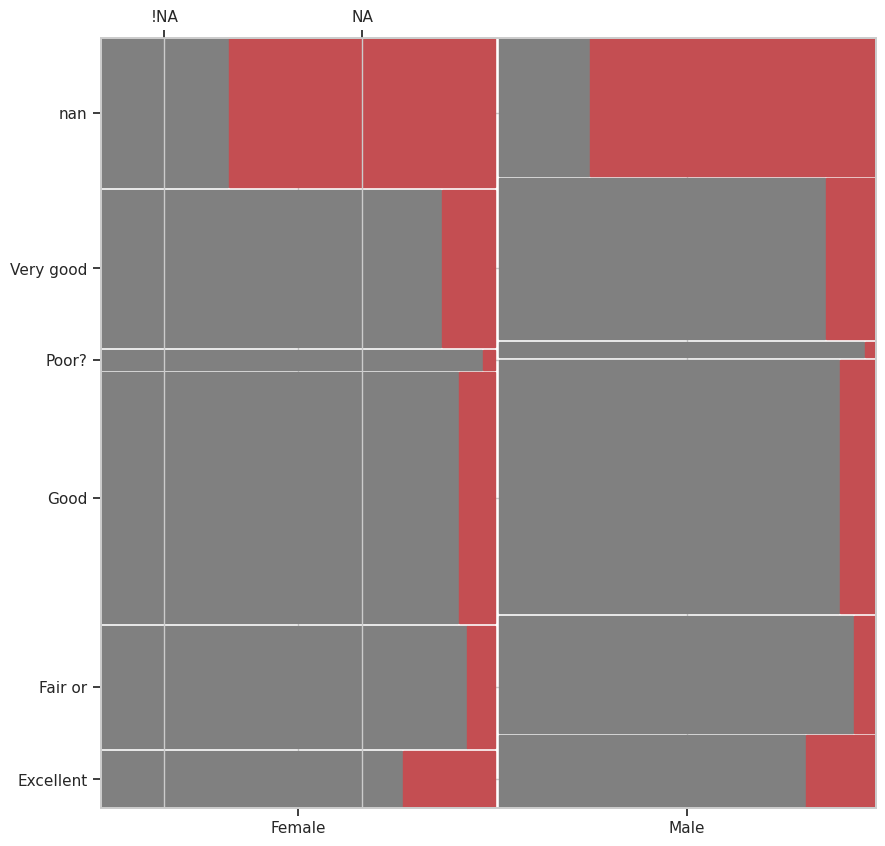

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

(
    nhanes_df
    .select_columns("weight", "general_health_condition", "gender")
    .assign(
        weight=lambda df: df.weight.isna().replace([True, False], ["NA", "!NA"])
    )
    .groupby(
        ["gender", "general_health_condition", "weight"],
        dropna=False,
        as_index=True
    )
    .size()
    .pipe(
        lambda df: mosaic(
            data=df,
            properties=lambda key: {"color": "r" if "NA" in key else "gray"},
            horizontal=True,
            axes_label=True,
            title="",
            labelizer=lambda key: "",
            ax=ax
        )
    )
);

Mientras mas alta sea la categoria, mas observaciones tiene. El color rojo representa la proporcion de valores faltantes del peso de esa categoria

Nos permite visualizar datos categoricos multivariantes de forma precisa e informativa.

(<Figure size 1000x1000 with 3 Axes>,
 {('Female', 'Excellent', '!NA'): (0.0,
   0.0,
   0.38910692830200494,
   0.0743407957417306),
  ('Female', 'Excellent', 'NA'): (0.3902367251483326,
   0.0,
   0.11930165254542605,
   0.0743407957417306),
  ('Female', 'Fair or', '!NA'): (0.0,
   0.07761948426632075,
   0.47227802180243583,
   0.15861158947062376),
  ('Female', 'Fair or', 'NA'): (0.4734078186487635,
   0.07761948426632075,
   0.036130559044995084,
   0.15861158947062376),
  ('Female', 'Good', '!NA'): (0.0,
   0.23950976226153467,
   0.4611244906122378,
   0.3260796636325006),
  ('Female', 'Good', 'NA'): (0.4622542874585654,
   0.23950976226153467,
   0.04728409023519317,
   0.3260796636325006),
  ('Female', 'Poor?', '!NA'): (0.0,
   0.5688681144186255,
   0.4926846041201908,
   0.0260326974258046),
  ('Female', 'Poor?', 'NA'): (0.49381440096651846,
   0.5688681144186255,
   0.015723976727240133,
   0.0260326974258046),
  ('Female', 'Very good', '!NA'): (0.0,
   0.5981795003690202,


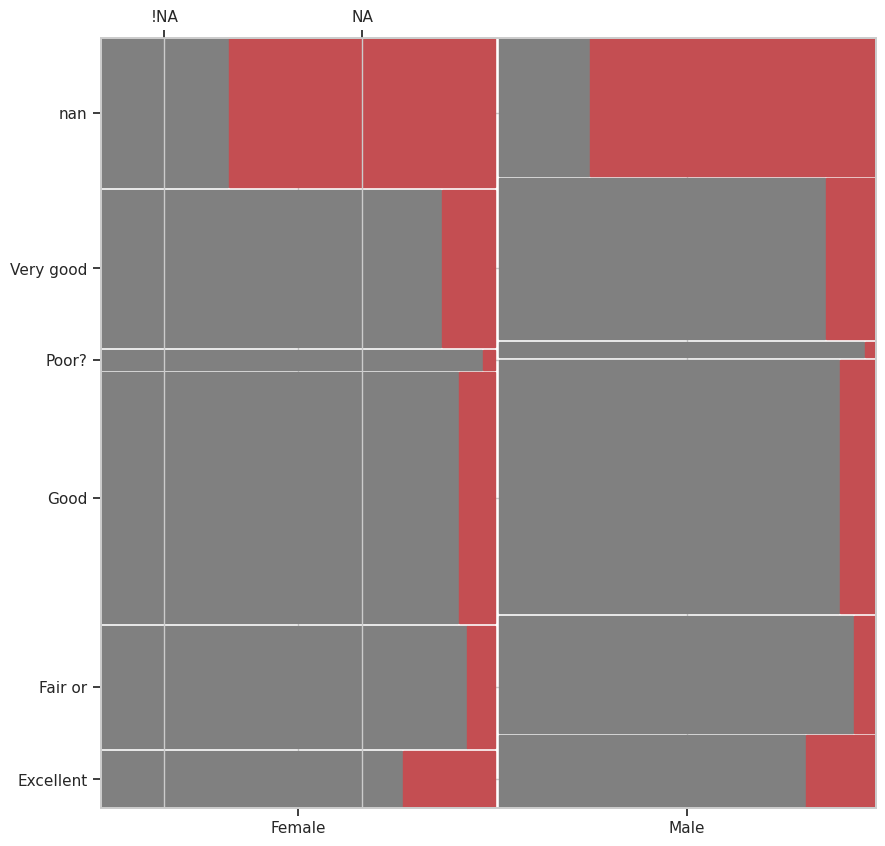

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

(
    nhanes_df
    .missing
    .missing_mosaic_plot(x_categorical_var="gender", y_categorical_var="general_health_condition", target_var="weight", ax=ax)
)

## Tratamiento de variables categóricas para imputación de valores faltantes

La mayor parte de las variables categoricas son cadenas de textos y por tanto realizar operaciones con ellas no es trivial. Es asi como surge la necesidad de convertir o codificar las cadenas de texto a numeros de manera que los algoritmos puedan entenderlos o asociarlos

In [13]:
nhanes_transformed_df = nhanes_df.copy(deep = True)

### Codificación ordinal

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
    Una codificación ordinal <b>implica</b> mapear cada etiqueta (categoría) única a un valor entero. A su vez, la codificación ordinal también es conocida como codificación entera.
    </p>
</div>

#### Ejemplo

Dado un conjunto de datos con dos características, encontraremos los valores únicos por cataracterística y los transformaremos utilizando una codificación ordinal.

In [14]:
encoder = sklearn.preprocessing.OrdinalEncoder()

X = [["Male"], ["Female"], ["Female"]]
X

[['Male'], ['Female'], ['Female']]

In [15]:
encoder.fit_transform(X)

array([[1.],
       [0.],
       [0.]])

In [16]:
encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [17]:
encoder.inverse_transform([[1], [0], [0]])

array([['Male'],
       ['Female'],
       ['Female']], dtype=object)

#### Aplicando la codificación ordinal a todas tus variables categóricas

In [18]:
categorical_columns = nhanes_df.select_dtypes(include=[object, "category"]).columns
categorical_columns

Index(['general_health_condition', 'gender'], dtype='object')

In [19]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), categorical_columns),
    remainder="passthrough", # Este parametro te pregunta ¿Que hago con las demas columnas de mi conjunto de datos?. En esta ocasion elegimos ignorarlas
)
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['general_health_condition', 'gender'], dtype='object'))])

In [20]:
nhanes_transformed_df = (
    pd.DataFrame(
        categorical_transformer.fit_transform(nhanes_df), # Le aplicamos la codificacion a nuestro df. Regresa un arreglo de arreglos, donde cada elemento es una fila del df
        columns=categorical_transformer.get_feature_names_out(), # Regresa los nombres de las columnas del df al que le ajustamos el encoder. Solo que los nombres llevaran "ordinalencoder" o "remainder" dependiendo de que como hayas configurado tu encoder. En este caso solo lo configuramos para aplicarle la codificacion ordinal a nuestras columnas 
        index=nhanes_df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)
nhanes_transformed_df

general_health_condition  gender  height  weight  total_cholesterol  \
SEQN                                                                            
93705.0                        2.0     0.0    63.0   165.0              157.0   
93706.0                        4.0     1.0    68.0   145.0              148.0   
93707.0                        2.0     1.0     NaN     NaN              189.0   
93709.0                        NaN     0.0    62.0   200.0              176.0   
93711.0                        4.0     1.0    69.0   142.0              238.0   
...                            ...     ...     ...     ...                ...   
102949.0                       0.0     1.0    72.0   180.0              201.0   
102953.0                       1.0     1.0    65.0   218.0              182.0   
102954.0                       2.0     0.0    66.0   150.0              172.0   
102955.0                       4.0     0.0     NaN     NaN              150.0   
102956.0                       2.0     1.0    69.0   250.0              163.0   

          pulse  diabetes   age  
SEQN                             
93705.0    52.0       0.0  66.0  
93706.0    82.0       0.0  18.0  
93707.0   100.0       0.0  13.0  
93709.0    74.0       0.0  75.0  
93711.0    62.0       0.0  56.0  
...         ...       ...   ...  
102949.0   96.0       0.0  33.0  
102953.0   78.0       0.0  42.0  
102954.0   78.0       0.0  41.0  
102955.0   74.0       0.0  14.0  
102956.0   76.0       0.0  38.0  

[7157 rows x 8 columns]

In [21]:
gender_encoder = sklearn.preprocessing.OrdinalEncoder()

gender_values = (
    nhanes_df
    .gender
    .values
    .reshape(-1, 1) # Recuerda que sklearn te pide por parametro un arreglo de la forma [[], [],,,]
)

gender_transformed = (
    gender_encoder
    .fit_transform(
        X = gender_values
    )
    .squeeze() # Lo vuelve un array de 1 dimension
)

(
    nhanes_df.gender.unique(),
    nhanes_transformed_df.gender.unique(),
    gender_encoder.categories_
)

nhanes_transformed_df.gender = gender_transformed

Esta es una manera diferente de codificar una sola columna, aunque la anterior nos sirve para codificar varias a la vez

In [22]:
nhanes_transformed_df

general_health_condition  gender  height  weight  total_cholesterol  \
SEQN                                                                            
93705.0                        2.0     0.0    63.0   165.0              157.0   
93706.0                        4.0     1.0    68.0   145.0              148.0   
93707.0                        2.0     1.0     NaN     NaN              189.0   
93709.0                        NaN     0.0    62.0   200.0              176.0   
93711.0                        4.0     1.0    69.0   142.0              238.0   
...                            ...     ...     ...     ...                ...   
102949.0                       0.0     1.0    72.0   180.0              201.0   
102953.0                       1.0     1.0    65.0   218.0              182.0   
102954.0                       2.0     0.0    66.0   150.0              172.0   
102955.0                       4.0     0.0     NaN     NaN              150.0   
102956.0                       2.0     1.0    69.0   250.0              163.0   

          pulse  diabetes   age  
SEQN                             
93705.0    52.0       0.0  66.0  
93706.0    82.0       0.0  18.0  
93707.0   100.0       0.0  13.0  
93709.0    74.0       0.0  75.0  
93711.0    62.0       0.0  56.0  
...         ...       ...   ...  
102949.0   96.0       0.0  33.0  
102953.0   78.0       0.0  42.0  
102954.0   78.0       0.0  41.0  
102955.0   74.0       0.0  14.0  
102956.0   76.0       0.0  38.0  

[7157 rows x 8 columns]

### _One Hot Encoding_

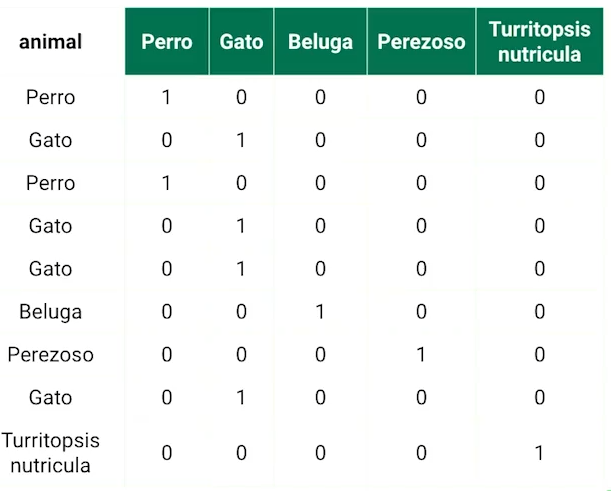

In [23]:
nhanes_transformed_df2 = nhanes_df.copy(deep=True)

### `pandas.get_dummies()` vs `skelearn.preprocessing.OneHotEncoder()`

#### `pandas.get_dummies()`

In [24]:
(
    nhanes_transformed_df2
    .select_columns("general_health_condition")
    #.head(10)
    .pipe(pd.get_dummies)
)

general_health_condition_Excellent  \
SEQN                                           
93705.0                                False   
93706.0                                False   
93707.0                                False   
93709.0                                False   
93711.0                                False   
...                                      ...   
102949.0                                True   
102953.0                               False   
102954.0                               False   
102955.0                               False   
102956.0                               False   

          general_health_condition_Fair or  general_health_condition_Good  \
SEQN                                                                        
93705.0                              False                           True   
93706.0                              False                          False   
93707.0                              False                           True   
93709.0                              False                          False   
93711.0                              False                          False   
...                                    ...                            ...   
102949.0                             False                          False   
102953.0                              True                          False   
102954.0                             False                           True   
102955.0                             False                          False   
102956.0                             False                           True   

          general_health_condition_Poor?  general_health_condition_Very good  
SEQN                                                                          
93705.0                            False                               False  
93706.0                            False                                True  
93707.0                            False                               False  
93709.0                            False                               False  
93711.0                            False                                True  
...                                  ...                                 ...  
102949.0                           False                               False  
102953.0                           False                               False  
102954.0                           False                               False  
102955.0                           False                                True  
102956.0                           False                               False  

[7157 rows x 5 columns]

Una de las desventajas es que se pierde el rastro de los valores faltantes, y ademas cuando queremos seleccionar sola una parte del df y esa parte no tiene alguna categoria, lo que va hacer es solo devolver los dummies de las categorias que la funcion detecta, lo cual es obviamente malo.

#### `skelearn.preprocessing.OneHotEncoder()`

In [25]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), ["gender"]), # Con ordinalencoder
    (sklearn.preprocessing.OneHotEncoder(), ["general_health_condition"]), # Con onehotencoder
    remainder="passthrough"
)

In [26]:
nhanes_transformed_df2 = (
    pd.DataFrame(
        transformer.fit_transform(nhanes_df), # Le aplicamos la codificacion a nuestro df. Regresa un arreglo de arreglos, donde cada elemento es una fila del df
        columns=transformer.get_feature_names_out(), # Regresa los nombres de las columnas del df al que le ajustamos el encoder. Solo que los nombres llevaran "ordinalencoder" o "remainder" dependiendo de que como hayas configurado tu encoder. En este caso solo lo configuramos para aplicarle la codificacion ordinal a nuestras columnas 
        index=nhanes_df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("onehotencoder__")
    )
)

nhanes_transformed_df2

gender  general_health_condition_Excellent  \
SEQN                                                   
93705.0      0.0                                 0.0   
93706.0      1.0                                 0.0   
93707.0      1.0                                 0.0   
93709.0      0.0                                 0.0   
93711.0      1.0                                 0.0   
...          ...                                 ...   
102949.0     1.0                                 1.0   
102953.0     1.0                                 0.0   
102954.0     0.0                                 0.0   
102955.0     0.0                                 0.0   
102956.0     1.0                                 0.0   

          general_health_condition_Fair or  general_health_condition_Good  \
SEQN                                                                        
93705.0                                0.0                            1.0   
93706.0                                0.0                            0.0   
93707.0                                0.0                            1.0   
93709.0                                0.0                            0.0   
93711.0                                0.0                            0.0   
...                                    ...                            ...   
102949.0                               0.0                            0.0   
102953.0                               1.0                            0.0   
102954.0                               0.0                            1.0   
102955.0                               0.0                            0.0   
102956.0                               0.0                            1.0   

          general_health_condition_Poor?  general_health_condition_Very good  \
SEQN                                                                           
93705.0                              0.0                                 0.0   
93706.0                              0.0                                 1.0   
93707.0                              0.0                                 0.0   
93709.0                              0.0                                 0.0   
93711.0                              0.0                                 1.0   
...                                  ...                                 ...   
102949.0                             0.0                                 0.0   
102953.0                             0.0                                 0.0   
102954.0                             0.0                                 0.0   
102955.0                             0.0                                 1.0   
102956.0                             0.0                                 0.0   

          general_health_condition_nan  height  weight  total_cholesterol  \
SEQN                                                                        
93705.0                            0.0    63.0   165.0              157.0   
93706.0                            0.0    68.0   145.0              148.0   
93707.0                            0.0     NaN     NaN              189.0   
93709.0                            1.0    62.0   200.0              176.0   
93711.0                            0.0    69.0   142.0              238.0   
...                                ...     ...     ...                ...   
102949.0                           0.0    72.0   180.0              201.0   
102953.0                           0.0    65.0   218.0              182.0   
102954.0                           0.0    66.0   150.0              172.0   
102955.0                           0.0     NaN     NaN              150.0   
102956.0                           0.0    69.0   250.0              163.0   

          pulse  diabetes   age  
SEQN                             
93705.0    52.0       0.0  66.0  
93706.0    82.0       0.0  18.0  
93707.0   100.0       0.0  13.0  
93709.0    74.0       0.0  75.0  
93711.0    62.0       0.0  56.0 

A este punto ya codificamos nuestras variables categoricas a onehotencoder

In [27]:
(
    transformer
    .named_transformers_
    .get("onehotencoder")
    .categories_
)

[array(['Excellent', 'Fair or', 'Good', 'Poor?', 'Very good', nan],
       dtype=object)]

In [28]:
(
    transformer
    .named_transformers_
    .get("onehotencoder")
    .inverse_transform(
        X=[[0, 0, 1, 0, 0, 0]] # Representa una fila
    )
)

array([['Good']], dtype=object)

Ordinalencoding nos serviria mas cuando tenemos entre 5-20 categorias. Onehotencoding nos seriviria para cuando tengamos miles de categorias, ya que cada variable tendra 1´s y 0´s y esto hara que el peso de cada variable sea el mismo; lo malo es que necesitamos mucho mas espacio, pero esto se puede solventar utilizando matrices especiales llamadas matrices spars. En lo profesional se suele usar mas el onehotencoding ya que mayormente tendremos muchisimas variables categoricas 

## Tipos de imputación de valores faltantes

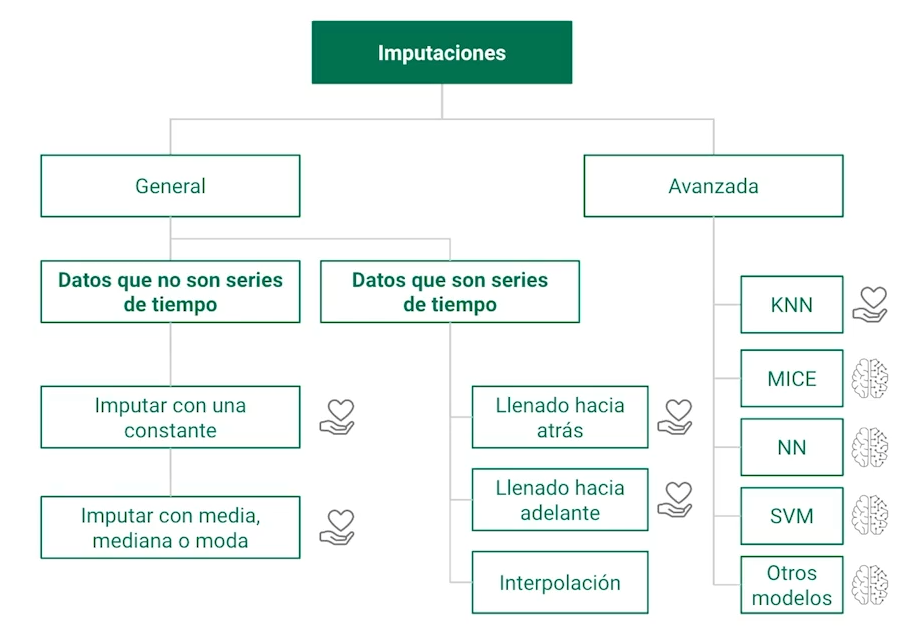

Los que tienen la manita son los tipos de imputacion con base en el donante y los que tienen el cerebro son imputacion por modelos

Imputacion basada en el donante:

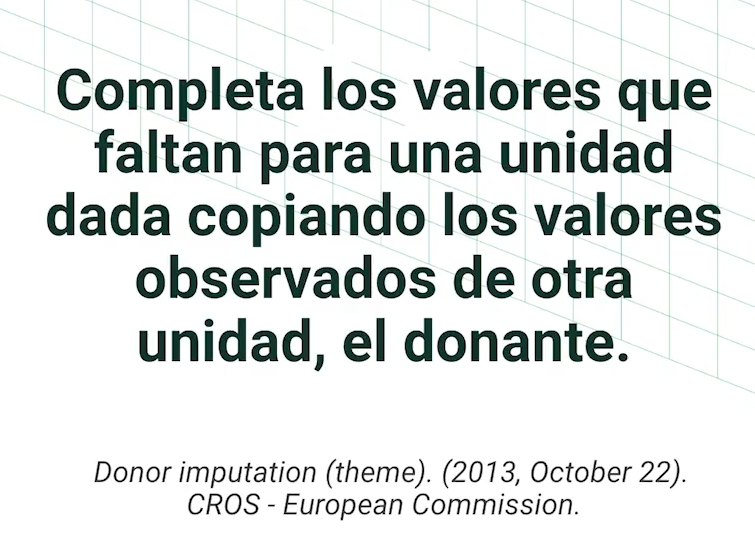

Imputacion basada por modelos

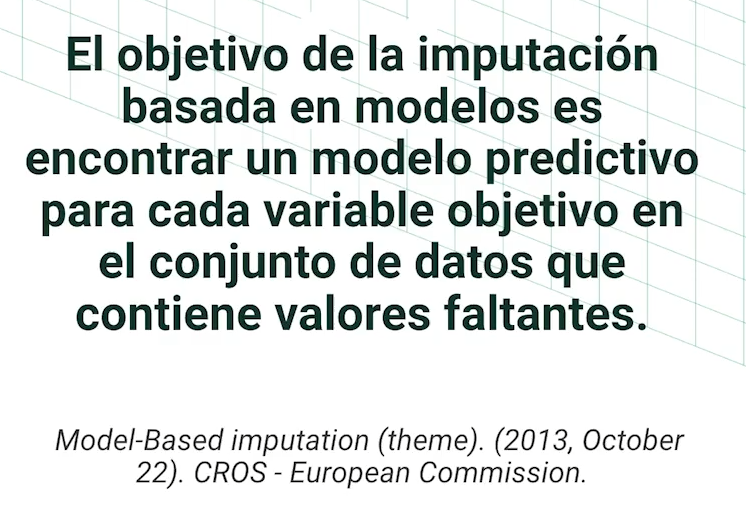

El metodo de interpolacion no pertenece a ninguna de estas categorias, despues veras por que

El método de interpolación es un enfoque común utilizado para la imputación de datos faltantes. En lugar de reemplazar los valores faltantes por un valor constante o un valor estimado basado en otras observaciones, la interpolación utiliza técnicas de interpolación matemática para estimar los valores faltantes en función de los valores observados cercanos en el tiempo o en el espacio.

La interpolación implica crear una función continua que pasa a través de los puntos de datos conocidos y luego estimar los valores faltantes en función de esta función continua. Hay varias técnicas de interpolación que se pueden utilizar, y la elección depende del tipo de datos y la estructura de los mismos. Algunas técnicas comunes de interpolación incluyen:

- Interpolación lineal: La técnica más simple, que asume una relación lineal entre los puntos de datos conocidos y utiliza una línea recta para conectar los puntos adyacentes.

- Interpolación polinómica: Utiliza polinomios para conectar los puntos conocidos y estimar los valores faltantes. Los polinomios de diferentes órdenes, como lineales, cuadráticos o cúbicos, pueden utilizarse según la complejidad de los datos.

- Interpolación spline: Utiliza una función spline, que es una curva suave definida por segmentos polinómicos, para conectar los puntos conocidos. La interpolación spline es más flexible y puede adaptarse mejor a patrones no lineales en los datos.

Cabe mencionar que la interpolación tiene sus limitaciones y supone que existe una relación continua y suave entre los puntos de datos. En algunos casos, como datos con patrones complejos o ruido significativo, la interpolación puede no ser la mejor opción y pueden requerirse enfoques más avanzados.

Es importante evaluar cuidadosamente los datos y considerar otros métodos de imputación, como la media, la mediana, la moda o algoritmos más sofisticados, según la naturaleza de los datos faltantes y el contexto del problema.

## Imputación de un único valor (media, mediana, moda)

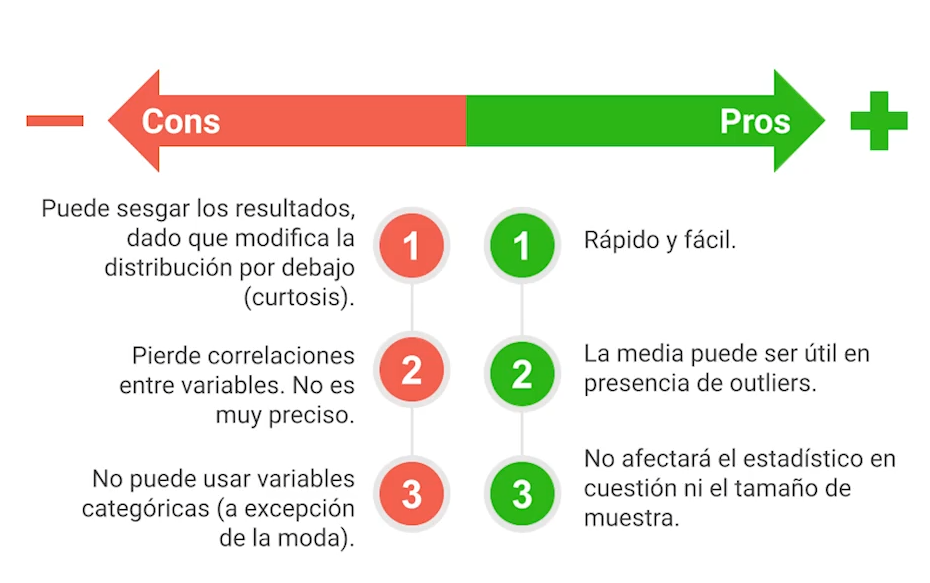

In [29]:
(
    nhanes_df
    # janitor
    .transform_column(
        "height",
        lambda x: x.fillna(x.mean()),
        elementwise=False # investiga para que sirve este parametro
    )

)

height  weight general_health_condition  total_cholesterol  pulse  \
SEQN                                                                            
93705.0   63.00000   165.0                     Good              157.0   52.0   
93706.0   68.00000   145.0                Very good              148.0   82.0   
93707.0   66.25656     NaN                     Good              189.0  100.0   
93709.0   62.00000   200.0                      NaN              176.0   74.0   
93711.0   69.00000   142.0                Very good              238.0   62.0   
...            ...     ...                      ...                ...    ...   
102949.0  72.00000   180.0                Excellent              201.0   96.0   
102953.0  65.00000   218.0                  Fair or              182.0   78.0   
102954.0  66.00000   150.0                     Good              172.0   78.0   
102955.0  66.25656     NaN                Very good              150.0   74.0   
102956.0  69.00000   250.0                     Good              163.0   76.0   

          diabetes   age  gender  
SEQN                              
93705.0          0  66.0  Female  
93706.0          0  18.0    Male  
93707.0          0  13.0    Male  
93709.0          0  75.0  Female  
93711.0          0  56.0    Male  
...            ...   ...     ...  
102949.0         0  33.0    Male  
102953.0         0  42.0    Male  
102954.0         0  41.0  Female  
102955.0         0  14.0  Female  
102956.0         0  38.0    Male  

[7157 rows x 8 columns]

<Axes: xlabel='height', ylabel='weight'>

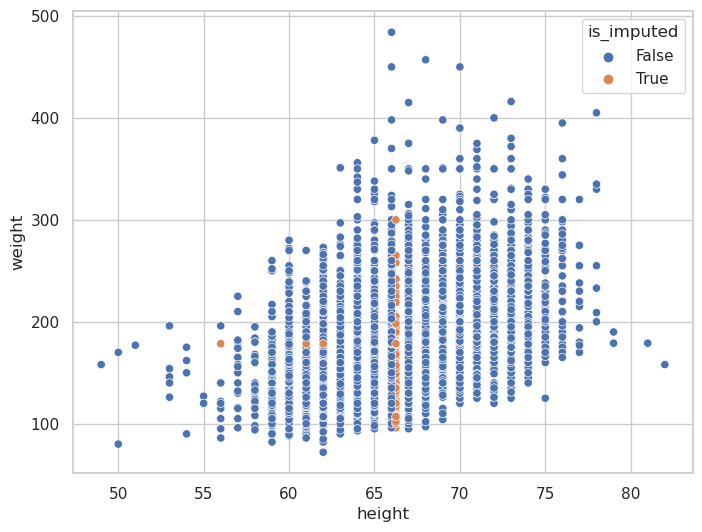

In [30]:
(
    nhanes_df
    .select_columns("height", "weight")
    .missing.bind_shadow_matrix(True, False, suffix = "_imp")
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mean()),
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight"
    )
)

En este caso la imputacion por promedio parece ser buena porque no rompe con la relacion

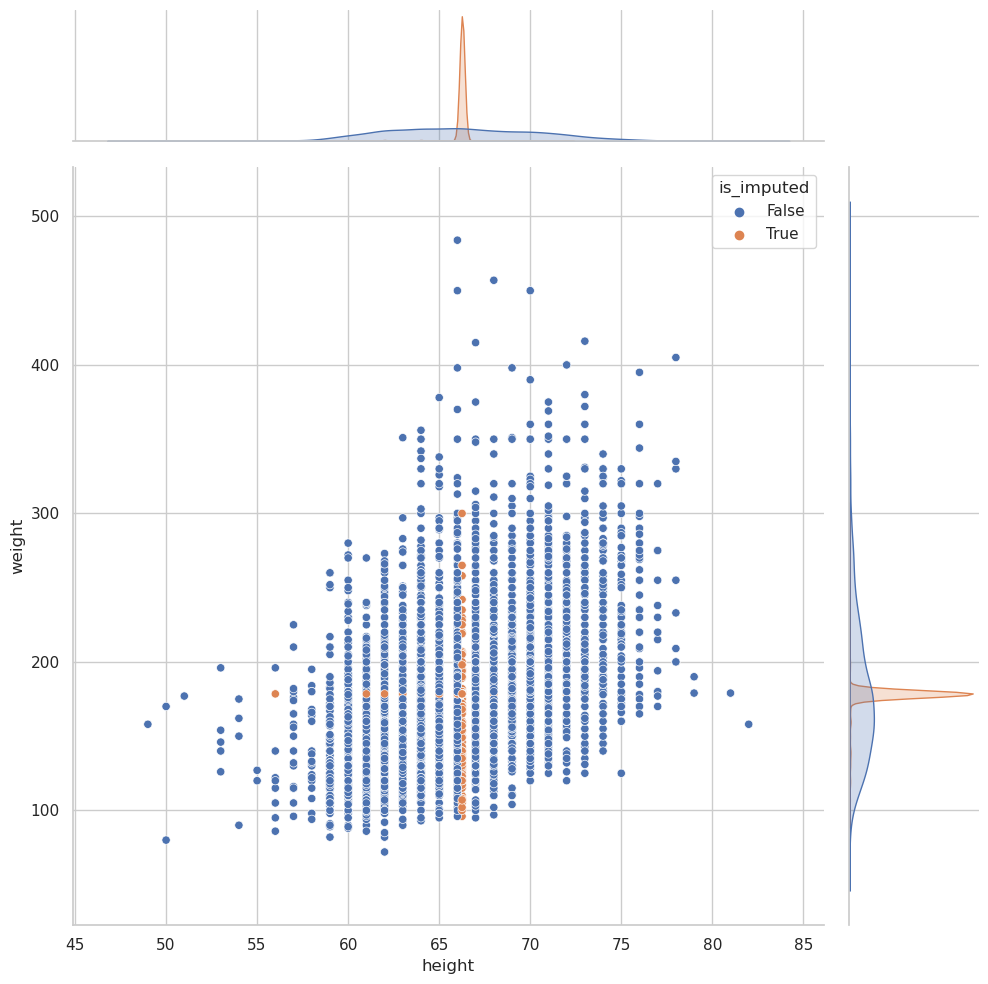

In [31]:
(
    nhanes_df
    .select_columns("height", "weight")
    .missing.bind_shadow_matrix(True, False, suffix = "_imp")
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mean()),
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight",
        show_marginal = True,
        height=10
    )
)

Con los margenes te podrias dar cuenta si se esta haciendo una correcta imputacion.

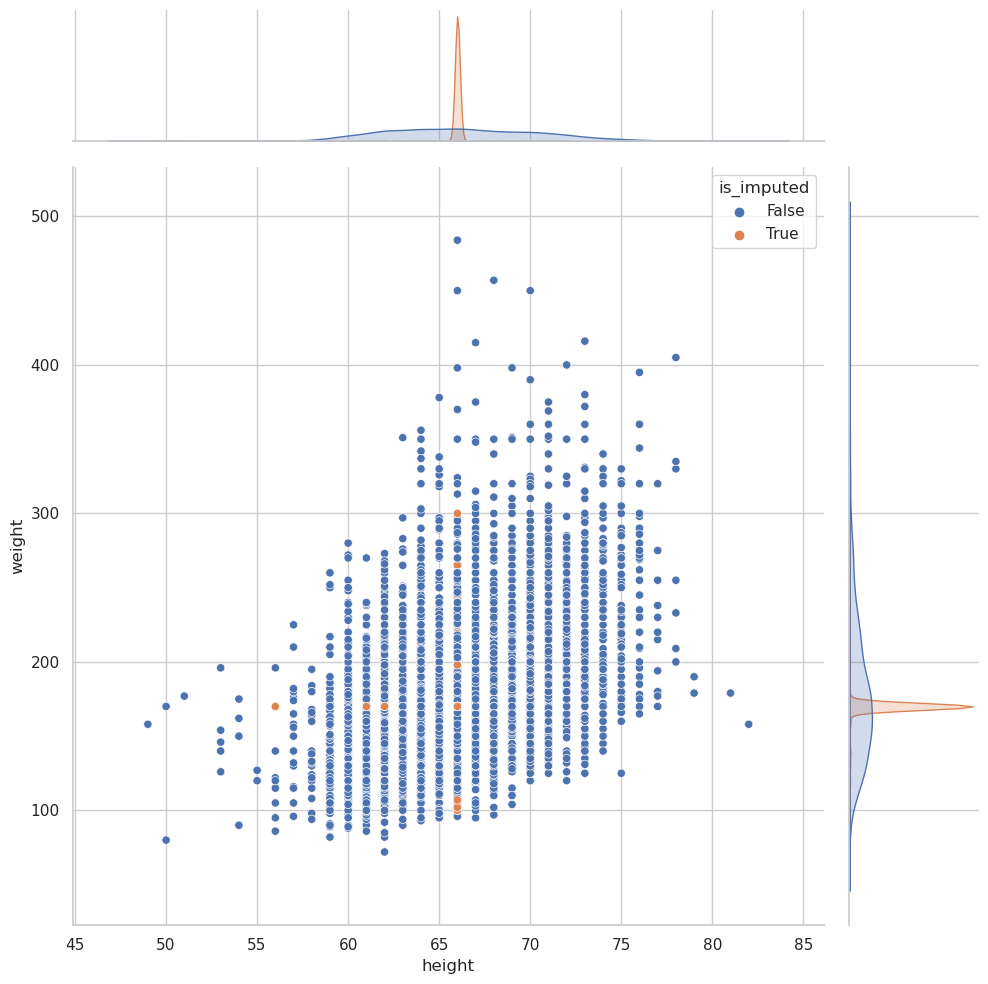

In [32]:
# Con la mediana
(
    nhanes_df
    .select_columns("height", "weight")
    .missing.bind_shadow_matrix(True, False, suffix = "_imp")
    .assign(
        height = lambda df: df.height.fillna(value = df.height.median()),
        weight = lambda df: df.weight.fillna(value = df.weight.median())
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight",
        show_marginal = True,
        height=10
    )
)

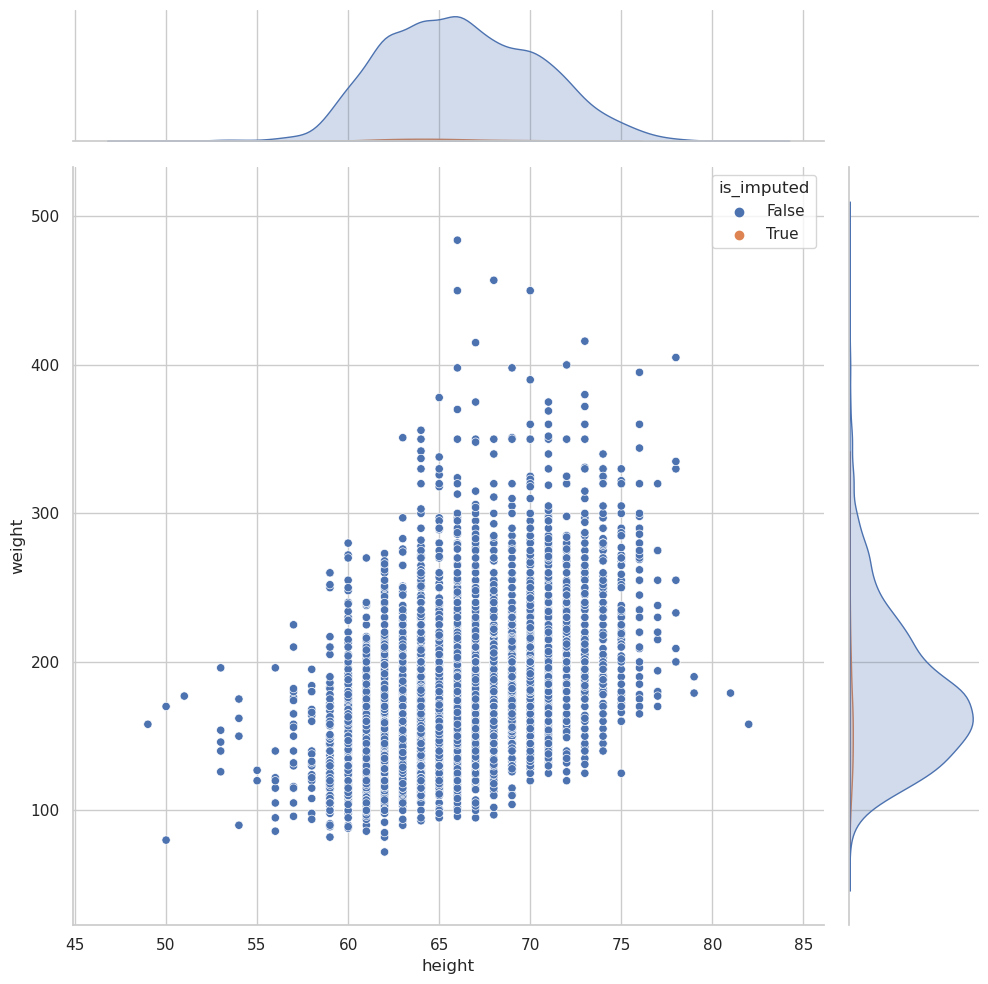

In [33]:
# Con la moda
(
    nhanes_df
    .select_columns("height", "weight")
    .missing.bind_shadow_matrix(True, False, suffix = "_imp")
    .assign(
        height = lambda df: df.height.fillna(value = df.height.mode()),
        weight = lambda df: df.weight.fillna(value = df.weight.mode())
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight",
        show_marginal = True,
        height=10
    )
)

## Imputación por llenado hacia atrás e imputación por llenado hacia adelante (Hot Deck y Cold Deck)

Consiste en sustituir los valores faltantes con valores completos que estan antes o despues.

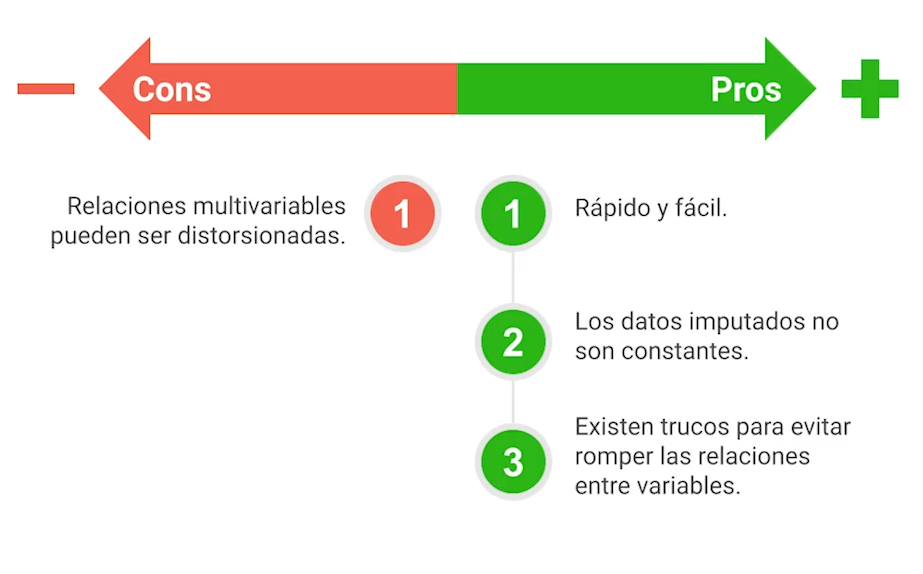

### `fillna()` vs `ffill()` o `bfill()`

In [34]:
(
    nhanes_df
    .select_columns("height", "weight")
    #.fillna(method = "ffill") # Aplica el llenado a todas las variables del df. Es lo mismo que el de abajo
    .ffill()
)

#ffill = forward fill

height  weight
SEQN                    
93705.0     63.0   165.0
93706.0     68.0   145.0
93707.0     68.0   145.0
93709.0     62.0   200.0
93711.0     69.0   142.0
...          ...     ...
102949.0    72.0   180.0
102953.0    65.0   218.0
102954.0    66.0   150.0
102955.0    66.0   150.0
102956.0    69.0   250.0

[7157 rows x 2 columns]

In [35]:
(
    nhanes_df
    .select_columns("height", "weight")
    .bfill()
)

height  weight
SEQN                    
93705.0     63.0   165.0
93706.0     68.0   145.0
93707.0     62.0   200.0
93709.0     62.0   200.0
93711.0     69.0   142.0
...          ...     ...
102949.0    72.0   180.0
102953.0    65.0   218.0
102954.0    66.0   150.0
102955.0    69.0   250.0
102956.0    69.0   250.0

[7157 rows x 2 columns]

#### Recomendaciones al imputar valores utilizando `ffill()` o `bfill()`

> Imputación dentro de dominios e imputación a través de variables correlacionadas

Para que la imputacion tenga mas sentido debemos considerar las variables categoricas. Podemos tratar las variables categoricas como dominios donde nuestra variable de interes toma solo valores dentro del mismo. Es decir, en cada categoria puede existir un rango distinto de valores para la variable de interes. Por lo tanto, haciendo imputaciones dentro de los dominios puedes conservar la estructura de los datos y las relaciones entre las variables. Para cada categoria pueden existir comportamientos distintos, no es lo mismo ordenarlo por una que por otra.

Un “dominio” se refiere a un grupo específico de observaciones dentro de tus datos que comparten ciertas características o propiedades en común. Estas características pueden ser variables categóricas o cualquier otro criterio que defina una agrupación lógica de datos

In [36]:
(
    nhanes_df
    .select_columns("height", "weight", "gender", "diabetes", "general_health_condition")
    .sort_values( # Por alguna razon, con esto lo que haces es que puedes llegar a traer valores faltantes de un dominio a otro dominio. Por lo que quiere decir que estamos introduciendo ruido. Ya que si hay muchos NaN juntos, estariamos acarreando el mismo valor para todos esos valores
        by = ["gender", "diabetes", "general_health_condition", "height"],
        ascending = True
    )
    .transform_column(
        "weight",
        lambda x: x.ffill(),
        elementwise = False
    )
)

height  weight  gender  diabetes general_health_condition
SEQN                                                              
94421.0    56.0   115.0  Female         0                Excellent
94187.0    59.0   130.0  Female         0                Excellent
95289.0    59.0   162.0  Female         0                Excellent
97967.0    59.0   130.0  Female         0                Excellent
99125.0    59.0   105.0  Female         0                Excellent
...         ...     ...     ...       ...                      ...
96561.0    74.0   290.0    Male         1                      NaN
96954.0     NaN   175.0    Male         1                      NaN
97267.0     NaN   175.0    Male         1                      NaN
97856.0     NaN   175.0    Male         1                      NaN
98317.0     NaN   175.0    Male         1                      NaN

[7157 rows x 5 columns]

TODO: Busca solucionar eso con groupby

## Imputación por interpolación

La interpolacion puede ser a base de donadores o por modelo, por eso es que anteriormento no lo categorizamos como uno de estos.

Recuerda que es un metodo para series de tiempo

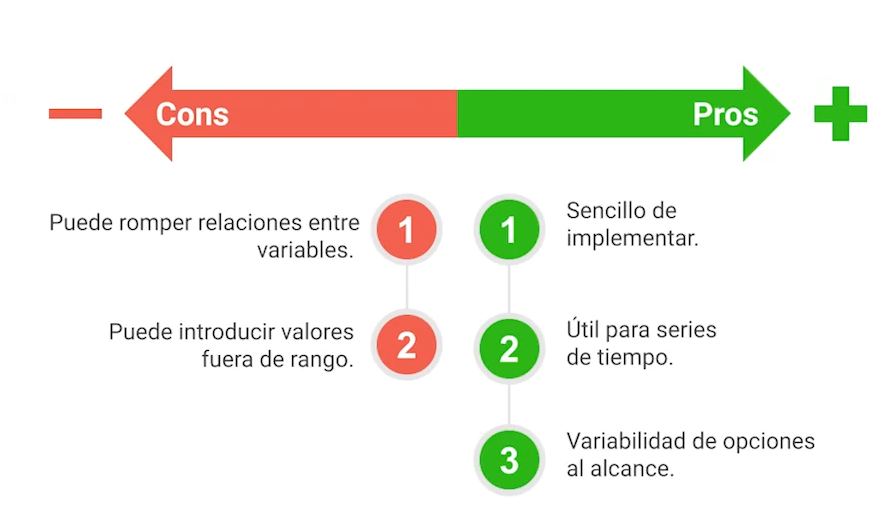

<Axes: xlabel='date'>

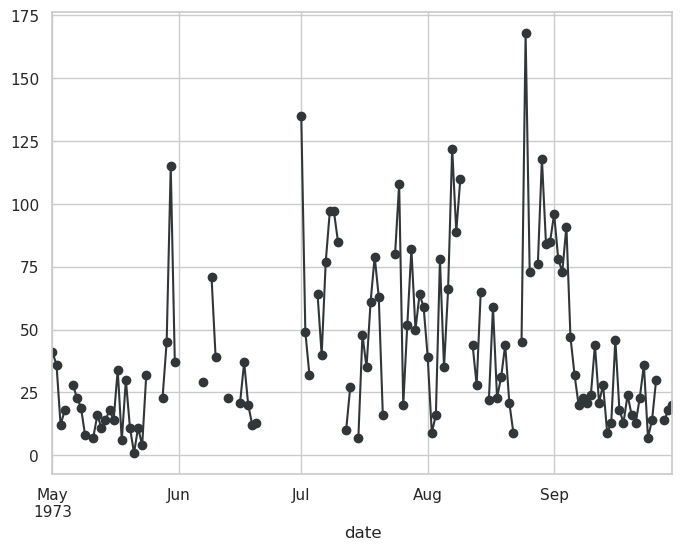

In [37]:
(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

Los espacios faltantes indican la falta de valores

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

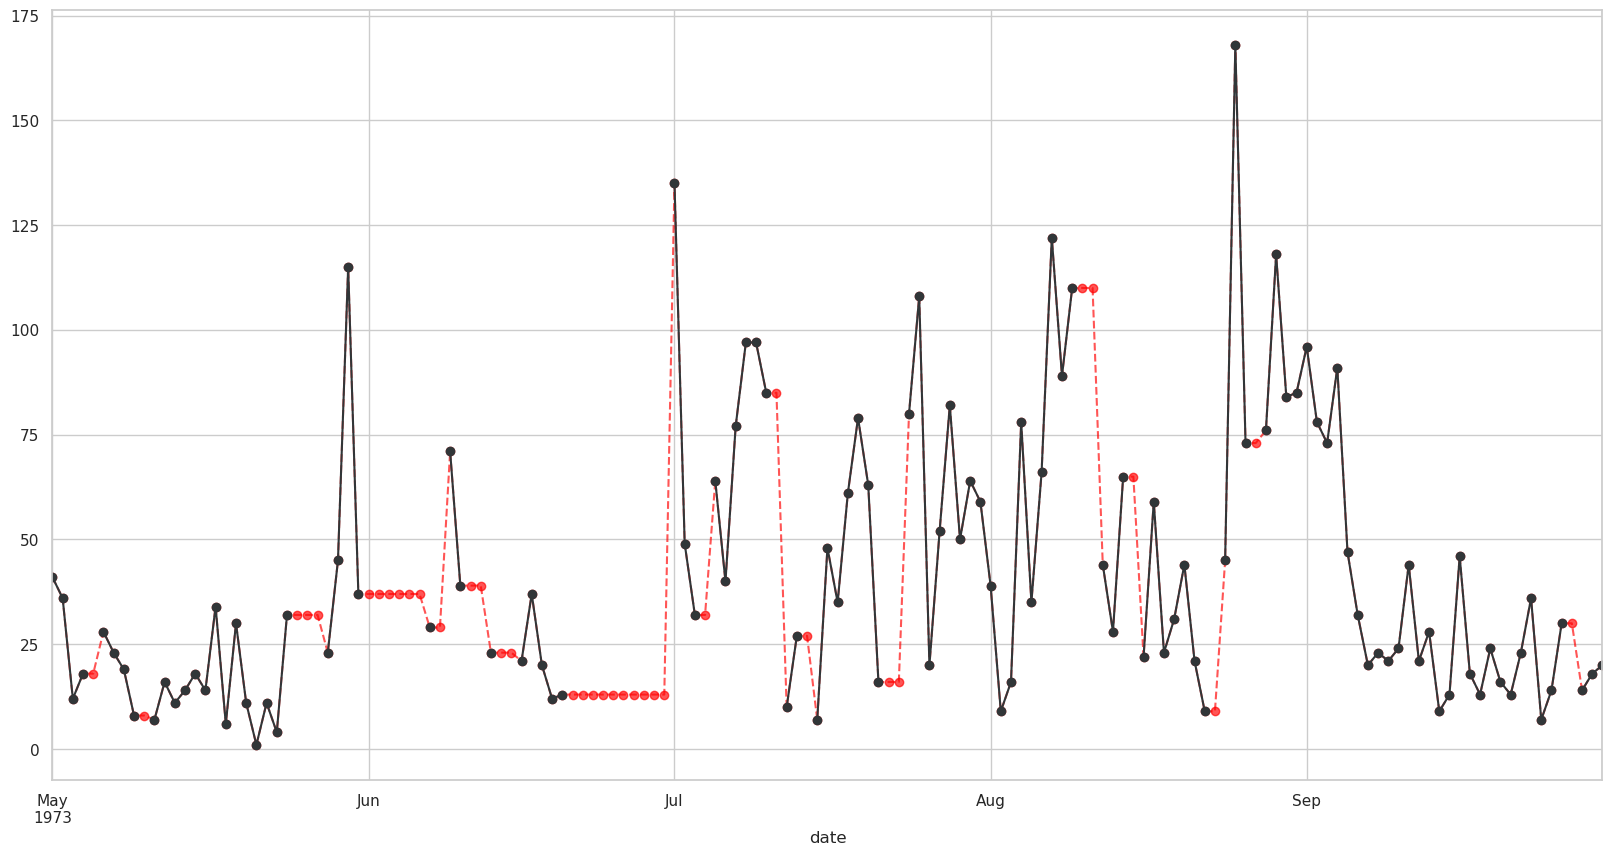

In [38]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.ffill().plot(color="red", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

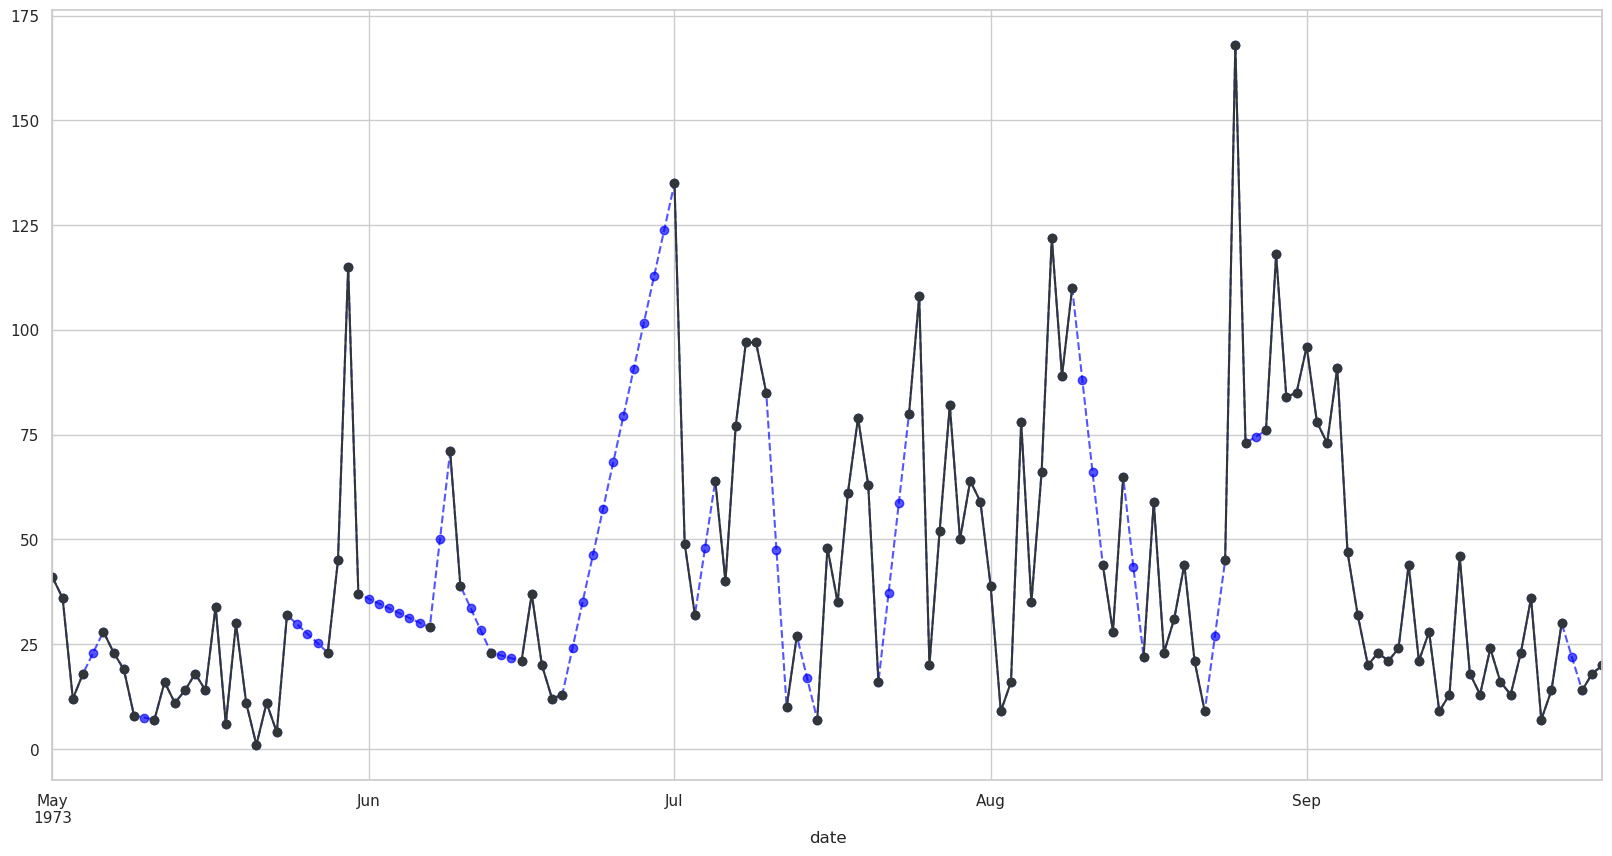

In [39]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method="linear").plot(color="blue", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

El metodo linear lo que hara es generar una linea recta entre un valor que yo conozco y otro valor que yo conozco para establecer los valores que desconozco. Como puedes ver tenemos variabilidad (en algunos lado va hacia abajo y otro hacia arriba) y eso es muy bueno. Es un metodo basado en un modelo linear

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

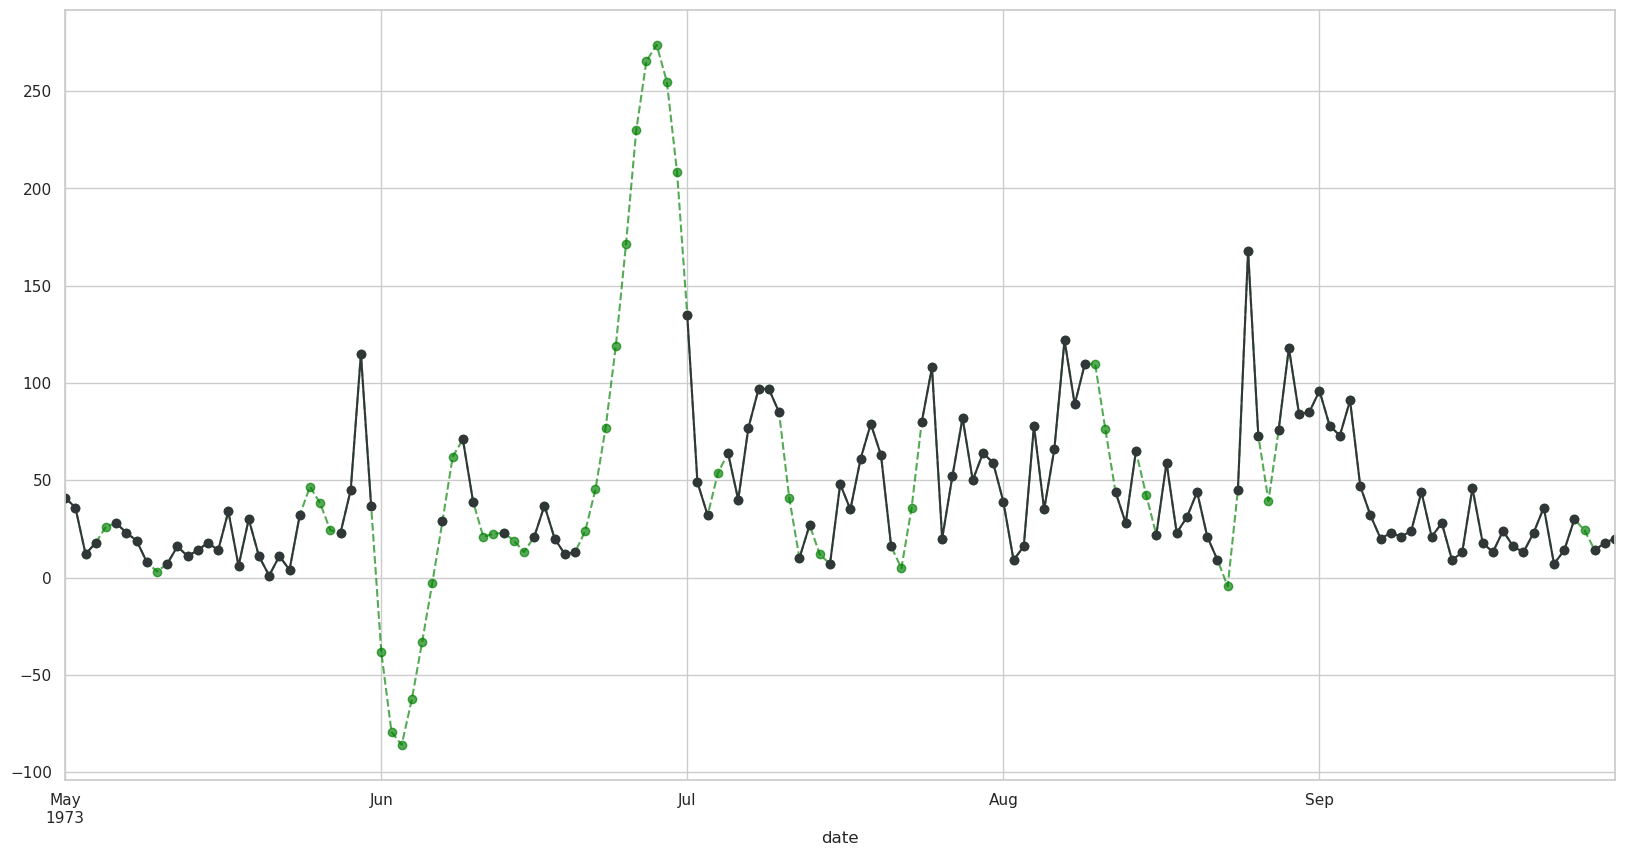

In [40]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method="quadratic").plot(color="green", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

Esta es rara, lo que hace es que dependiendo de que forma tenga nuestros datos, va intentar simular como una funcion cuadratica. En este caso no nos sirve porque si notas da valores debajo de 0, los cuales no existen en el ozono

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

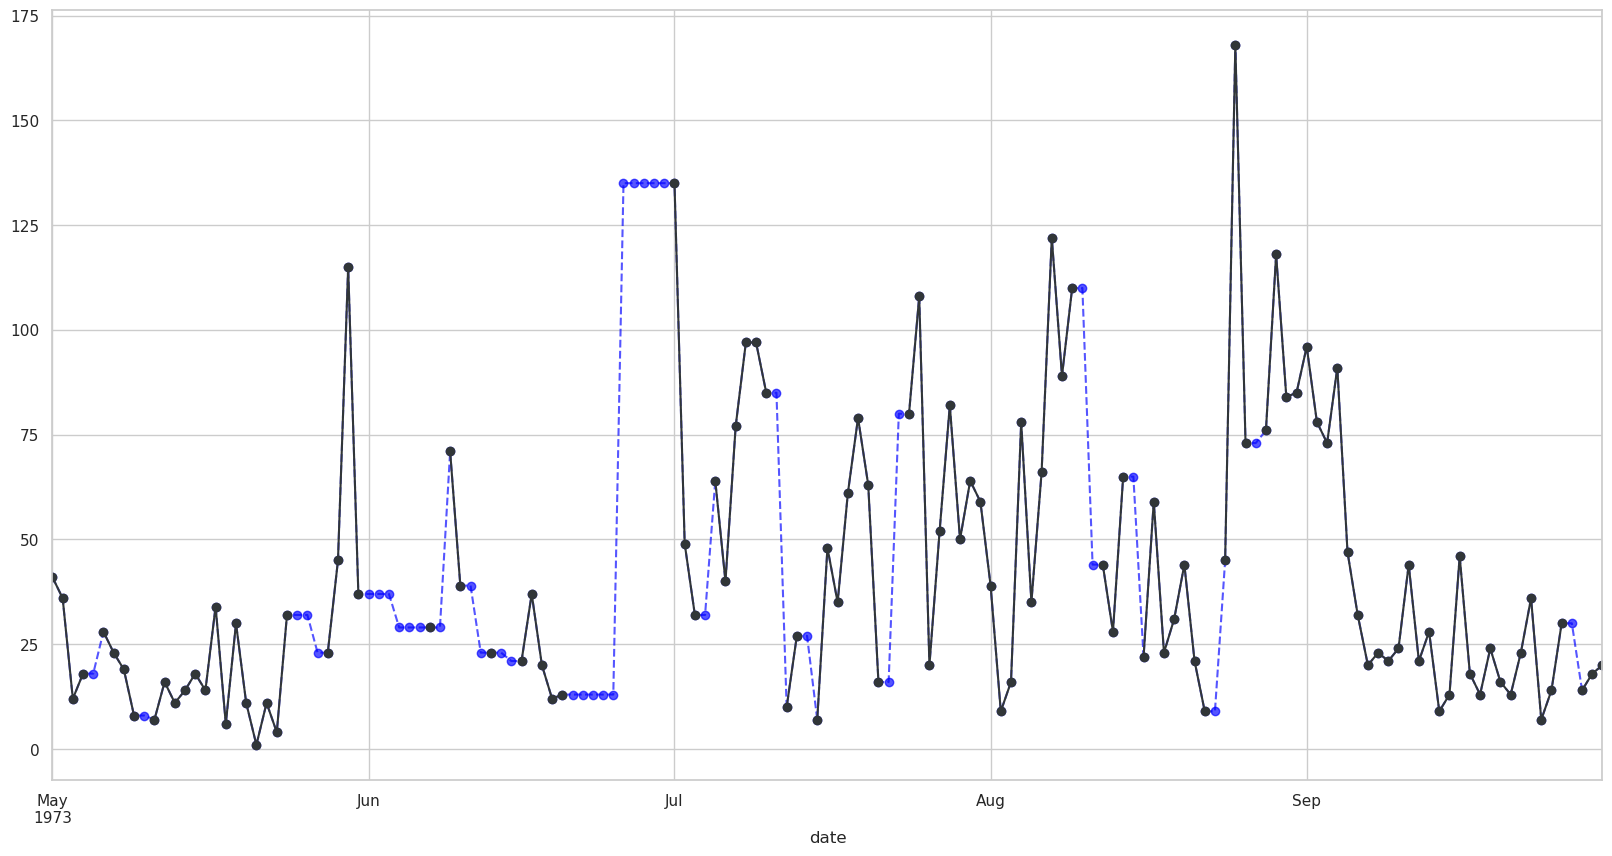

In [41]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method="nearest").plot(color="blue", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

Lo que hara este metodo es una combinacion de bfill y fffill, dependiendo del valor que este mas cerca, ya sea hacia la izquierda o a la derecha. Como puedes ver tambien agregamos variabilidad pero tal vez no tenga sentido la disparidad o la forma que toman. Es un metodo basado en donantes

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

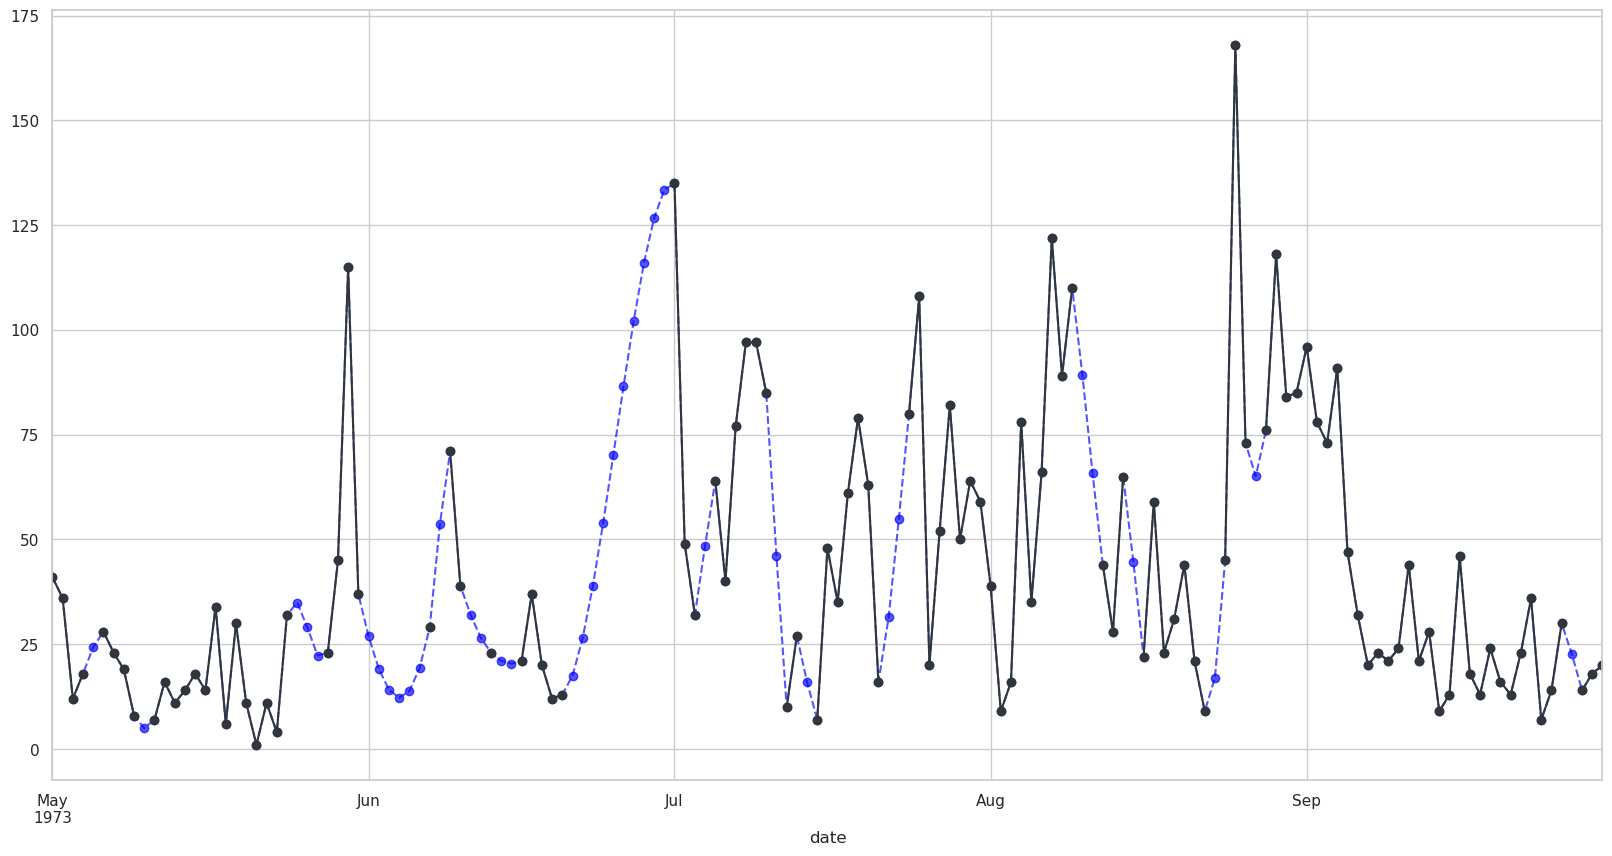

In [42]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method="akima").plot(color="blue", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

(<Axes: xlabel='date'>, <Axes: xlabel='date'>)

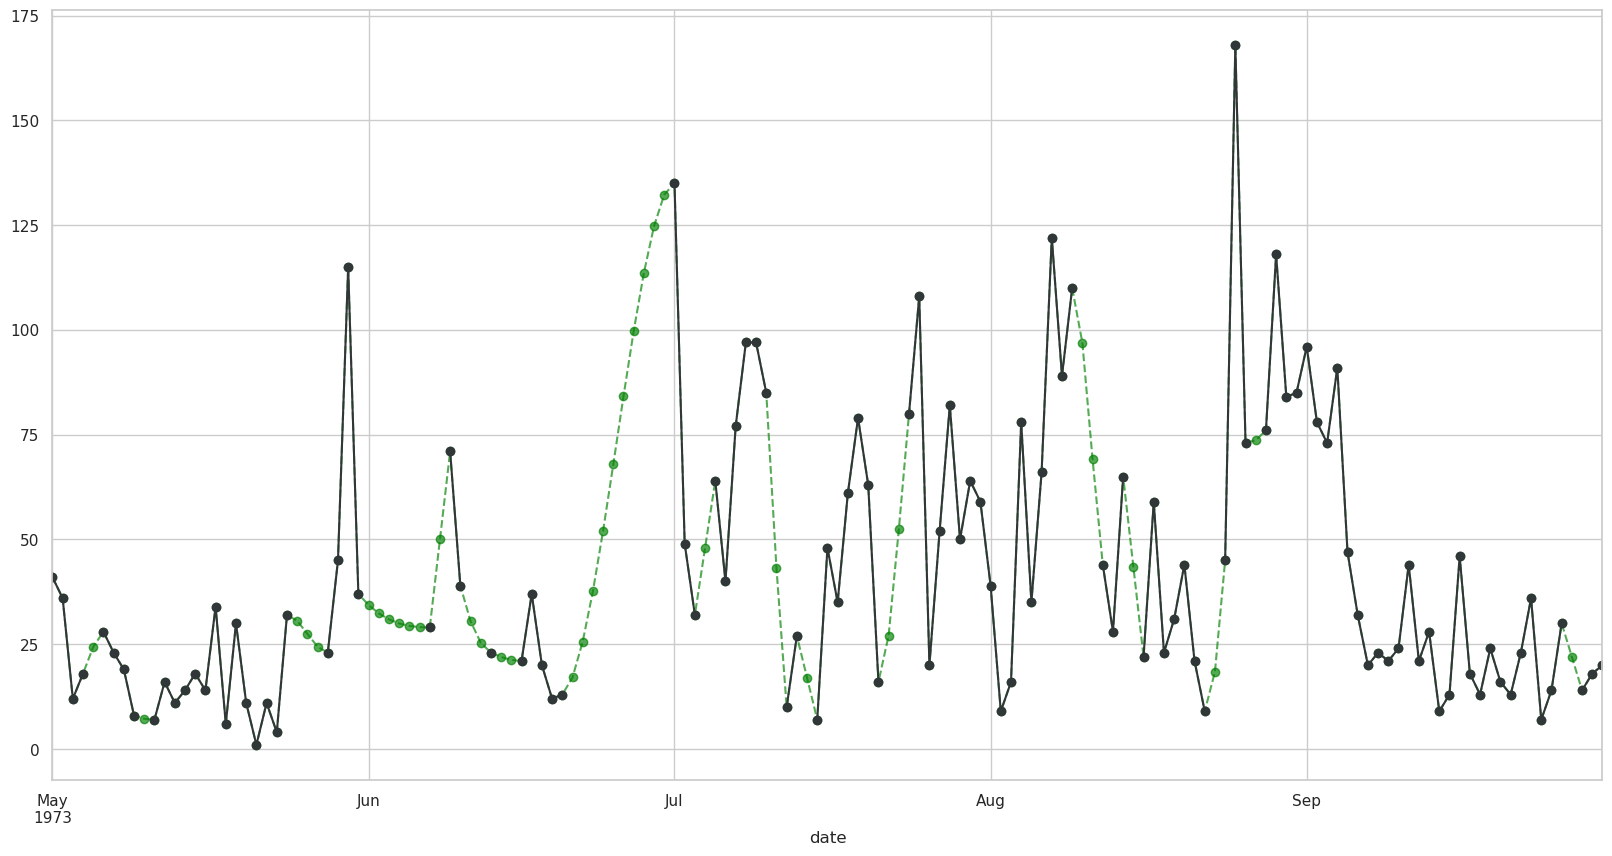

In [43]:
plt.figure(figsize=(20, 10))

(
    airquality_df
    .select_columns("ozone")
    .pipe(
        lambda df: (
            df.ozone.interpolate(method="pchip").plot(color="green", marker="o", alpha = 6/9, linestyle="dashed"),
            df.ozone.plot(color= "#313638", marker = "o")
        )
    )
)

Si te fijas, el metodo akima y pchip tambien hacen un buen trabajo, podriamos elegirlos sin problema. Aunque tambien te sugiero que investigues que hacen por dentro :)

Hasta el momento, la mejor intepolacion ha sido la linear, la cual es la que mejor se ve.

Despues de elegir cual metodo de interpolacion se ajusta mas, debemos aplicarselo a nuestro conjunto de datos, lo cual es lo siguiente que haremos:

In [44]:
airquality_df["ozone"] = airquality_df.ozone.interpolate(method="linear")

In [45]:
airquality_df

ozone  solar_r  wind  temp  month  day  year
date                                                    
1973-05-01   41.0    190.0   7.4    67      5    1  1973
1973-05-02   36.0    118.0   8.0    72      5    2  1973
1973-05-03   12.0    149.0  12.6    74      5    3  1973
1973-05-04   18.0    313.0  11.5    62      5    4  1973
1973-05-05   23.0      NaN  14.3    56      5    5  1973
...           ...      ...   ...   ...    ...  ...   ...
1973-09-26   30.0    193.0   6.9    70      9   26  1973
1973-09-27   22.0    145.0  13.2    77      9   27  1973
1973-09-28   14.0    191.0  14.3    75      9   28  1973
1973-09-29   18.0    131.0   8.0    76      9   29  1973
1973-09-30   20.0    223.0  11.5    68      9   30  1973

[153 rows x 7 columns]

## Imputación por algoritmo de vecinos más cercanos (KNN)

In [46]:
nhanes_transformed_df

general_health_condition  gender  height  weight  total_cholesterol  \
SEQN                                                                            
93705.0                        2.0     0.0    63.0   165.0              157.0   
93706.0                        4.0     1.0    68.0   145.0              148.0   
93707.0                        2.0     1.0     NaN     NaN              189.0   
93709.0                        NaN     0.0    62.0   200.0              176.0   
93711.0                        4.0     1.0    69.0   142.0              238.0   
...                            ...     ...     ...     ...                ...   
102949.0                       0.0     1.0    72.0   180.0              201.0   
102953.0                       1.0     1.0    65.0   218.0              182.0   
102954.0                       2.0     0.0    66.0   150.0              172.0   
102955.0                       4.0     0.0     NaN     NaN              150.0   
102956.0                       2.0     1.0    69.0   250.0              163.0   

          pulse  diabetes   age  
SEQN                             
93705.0    52.0       0.0  66.0  
93706.0    82.0       0.0  18.0  
93707.0   100.0       0.0  13.0  
93709.0    74.0       0.0  75.0  
93711.0    62.0       0.0  56.0  
...         ...       ...   ...  
102949.0   96.0       0.0  33.0  
102953.0   78.0       0.0  42.0  
102954.0   78.0       0.0  41.0  
102955.0   74.0       0.0  14.0  
102956.0   76.0       0.0  38.0  

[7157 rows x 8 columns]

In [47]:
knn_imputer = sklearn.impute.KNNImputer()

In [48]:
nhanes_df_knn = nhanes_transformed_df.copy(deep=True)

In [49]:
nhanes_df_knn.iloc[:, :] = knn_imputer.fit_transform(nhanes_transformed_df).round()
nhanes_df_knn

general_health_condition  gender  height  weight  total_cholesterol  \
SEQN                                                                            
93705.0                        2.0     0.0    63.0   165.0              157.0   
93706.0                        4.0     1.0    68.0   145.0              148.0   
93707.0                        2.0     1.0    69.0   130.0              189.0   
93709.0                        2.0     0.0    62.0   200.0              176.0   
93711.0                        4.0     1.0    69.0   142.0              238.0   
...                            ...     ...     ...     ...                ...   
102949.0                       0.0     1.0    72.0   180.0              201.0   
102953.0                       1.0     1.0    65.0   218.0              182.0   
102954.0                       2.0     0.0    66.0   150.0              172.0   
102955.0                       4.0     0.0    71.0   159.0              150.0   
102956.0                       2.0     1.0    69.0   250.0              163.0   

          pulse  diabetes   age  
SEQN                             
93705.0    52.0       0.0  66.0  
93706.0    82.0       0.0  18.0  
93707.0   100.0       0.0  13.0  
93709.0    74.0       0.0  75.0  
93711.0    62.0       0.0  56.0  
...         ...       ...   ...  
102949.0   96.0       0.0  33.0  
102953.0   78.0       0.0  42.0  
102954.0   78.0       0.0  41.0  
102955.0   74.0       0.0  14.0  
102956.0   76.0       0.0  38.0  

[7157 rows x 8 columns]

<Axes: xlabel='height', ylabel='weight'>

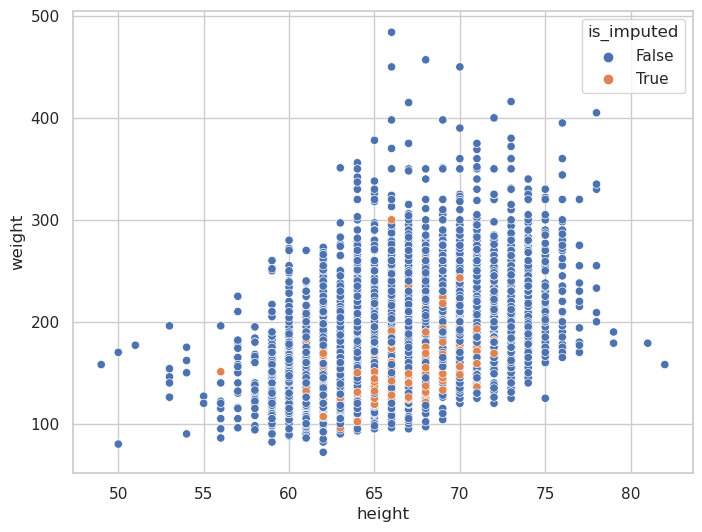

In [50]:
(
    pd.concat(
        [
            nhanes_df_knn,
            nhanes_df.missing.create_shadow_matrix(True, False, suffix="_imp", only_missing=True)
        ],
        axis=1
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight"
    )
)

Si te fijas, no rompemos con una relacion o algo por el estilo. Ademas es bueno que tengan variabilidad y no estemos monotizando nuestro conjunto de datos

Esta es una de las imputaciones mas conocidas y usadas.

**Ordenamiento por cantidad de variables faltantes**
Ordenar los datos por la cantidad de valiables faltantes nos da cierto rigor al momento de la imputacion. Esto se logra comenzando con definir las distancias entre valores existentes para luego predecir o imputar valores que no existen repitiendo el proceso paso a paso hasta lograr la imputacion completa de los datos. Algunos algoritmos implementan esta tecnica por defecto.



### Ordenamiento por cantidad de variables faltantes

In [53]:
knn_imputer = sklearn.impute.KNNImputer()

nhanes_df_knn = nhanes_transformed_df.missing.sort_variables_by_missingness(ascending=True).copy(deep=True)

nhanes_df_knn.iloc[:, :] = knn_imputer.fit_transform(nhanes_transformed_df).round()
nhanes_df_knn

gender  diabetes   age  pulse  total_cholesterol  \
SEQN                                                         
93705.0      2.0       0.0  63.0  165.0              157.0   
93706.0      4.0       1.0  68.0  145.0              148.0   
93707.0      2.0       1.0  69.0  130.0              189.0   
93709.0      2.0       0.0  62.0  200.0              176.0   
93711.0      4.0       1.0  69.0  142.0              238.0   
...          ...       ...   ...    ...                ...   
102949.0     0.0       1.0  72.0  180.0              201.0   
102953.0     1.0       1.0  65.0  218.0              182.0   
102954.0     2.0       0.0  66.0  150.0              172.0   
102955.0     4.0       0.0  71.0  159.0              150.0   
102956.0     2.0       1.0  69.0  250.0              163.0   

          general_health_condition  weight  height  
SEQN                                                
93705.0                       52.0     0.0    66.0  
93706.0                       82.0     0.0    18.0  
93707.0                      100.0     0.0    13.0  
93709.0                       74.0     0.0    75.0  
93711.0                       62.0     0.0    56.0  
...                            ...     ...     ...  
102949.0                      96.0     0.0    33.0  
102953.0                      78.0     0.0    42.0  
102954.0                      78.0     0.0    41.0  
102955.0                      74.0     0.0    14.0  
102956.0                      76.0     0.0    38.0  

[7157 rows x 8 columns]

## Imputación basada en modelos

## Imputaciones Múltiples por Ecuaciones Encadenadas (MICE)

## Transformación inversa de los datos

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
    ¡Tu progreso es increíble! ¡Ahora eres capaz de llevar tus análisis al siguiente nivel! La barrera de los valores faltantes ya no es una limitante extrema para tu trabajo. Tú puedes explorar valores faltantes, eliminarlos e imputarlos siendo consciente de las ventajas y desventajas de cada método elegido. ¡Fantástico!
    </p>
    <p>
    <b>¿Cómo puedo continuar mi aprendizaje en el análisis de valores faltantes?</b>
    Poner en práctica lo aprendido es una excelente opción. Por lo tanto, te recomiendo repetir este curso utilizando la totalidad de los datos del <i>National Health and Nutrition Examination Survey</i>. Con este proyecto, serás capaz de explorar y analizar una cantidad de valores faltantes variadas. Podrás probar distintos algoritmos y estrategias. 
    </p>
    <p>
    De tal forma de que, una vez consigas tu conjunto de datos final, puedas proceder a la exploración definitiva del conjunto de datos para extraer ideas y respuestas a preguntas de tu interés. Incluso, y por qué no, podrías explorar la posibilidad de crear modelos predictivos para la diabetes. Las opciones son ilimitadas. Bienvenido al mundo de la Ciencia de Datos.
    </p>
    <p>
    Con mucha alegría por tu logro,
    Jesús Vélez Santiago
    </p>
</div>

## Información de sesión

In [52]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>